# **Advanced Apex Project I**

# **Project Title:** Clustering Biological Specimens by Morphological Features


## **Project Overview**

This project performs unsupervised clustering on the Dry Bean dataset, which contains structured numerical features describing bean shapes. The workflow begins with essential data preprocessing, including PowerTransformer for stabilizing skewed distributions, StandardScaler for normalization, and removal of highly correlated features to reduce redundancy.

Using the reduced feature set, multiple values of k were evaluated through the Elbow Method and Silhouette Scores.

The resulting clusters were then visualized using 2-D scatter plots of key feature pairs to examine how the natural groupings are formed in the feature space. Overall, this pipeline provides a clean, interpretable clustering solution for the dataset.




## **Team Details:**

**Team Name:** Vector Minds

**Team Members:**

               1. Aswin Kumar K S - 2025em1100107@bitspilani-digital.edu.in
               2. Magdalene Sunitha - 2025em1100265@bitspilani-digital.edu.in

**Project Supervisor:** Karuna Mangla

# **1. Phase I - Proposal & Data Acquisition**



In [1]:
%pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 86.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: matplotlib
    Found existin

## **1.1 Extraction**

In [1]:
# --- Import required libraries ---
from ucimlrepo import fetch_ucirepo
import pandas as pd

# --- Fetch the Dry Bean dataset from UCI ---
dry_bean = fetch_ucirepo(id=602)

# --- Combine features and target into one DataFrame ---
df = pd.concat([dry_bean.data.features, dry_bean.data.targets], axis=1)

# --- Display info about the dataset ---
print(" Dry Bean dataset loaded successfully!")
print("Shape of dataset:", df.shape)
print("\nSample rows:")
print(df.head())


 Dry Bean dataset loaded successfully!
Shape of dataset: (13611, 17)

Sample rows:
    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0  28395    610.291       208.178117       173.888747     1.197191   
1  28734    638.018       200.524796       182.734419     1.097356   
2  29380    624.110       212.826130       175.931143     1.209713   
3  30008    645.884       210.557999       182.516516     1.153638   
4  30140    620.134       201.847882       190.279279     1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  Sha

## **1.2 Reproducibility**

In [2]:
import os

# Define the path for the new directory
#parent_dir = "/content/drive/MyDrive/Colab Notebooks/Apex_Project_1/Vector_Minds"
parent_dir = "/content"

data_folder = "/data"
full_data_path = parent_dir + data_folder
# Create the directory if it doesn't exist
if not os.path.exists(full_data_path):
    os.makedirs(full_data_path,exist_ok=True)
    print(f"Directory '{full_data_path}' created.")
else:
    print(f"Directory '{full_data_path}' already exists.")

df.to_csv(f"{full_data_path}/Bean_Data_Full.csv", index=False)
print("\n File saved as 'Bean_Data_Full.csv'")

Directory '/content/data' created.

 File saved as 'Bean_Data_Full.csv'


# **1.3 Data Dictionary**


In [3]:
# Print metadata (general info)
print("=== METADATA ===")
print(dry_bean.metadata)

# Print variable information (columns)
print("\n=== VARIABLE INFO ===")
print(dry_bean.variables)


=== METADATA ===
{'uci_id': 602, 'name': 'Dry Bean', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Thu Mar 28 2024', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'ID': 244, 'type': 'NATIVE', 'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özk

In [4]:
# --- Extract variable information from metadata ---
variables = dry_bean.variables

# --- Create Data Dictionary DataFrame ---
data_dict = pd.DataFrame({
    "Feature": variables["name"],
    "Data Type": variables["type"],
    "Description": variables["description"],
    "PK (Yes/No)": ["No"] * len(variables)   # None of these are primary keys
})

# --- Clean up (fill missing descriptions) ---
data_dict["Description"] = data_dict["Description"].fillna("N/A")




In [5]:
# Add manual entry for 'ID'
manual_row = pd.DataFrame({
    'Feature': ['ID'],
    'Data Type': ['Integer'],
    'Description': ['Additional Column used as a Primary key / unique identifier'],
    'PK (Yes/No)': ['Yes']
})

# Combine manual row with automatically generated dictionary
data_dict = pd.concat([manual_row, data_dict], ignore_index=True)

# View or export
display(data_dict.head())

# --- Save as Excel ---
data_dict.to_csv(f"{parent_dir}/Vector_Minds_Dry_Bean_Data_Dictionary.csv", index=False)

print("Data Dictionary generated and saved as 'Vector_Minds_Dry_Bean_Data_Dictionary.csv'")

Feature   Data Type  \
0               ID     Integer   
1             Area     Integer   
2        Perimeter  Continuous   
3  MajorAxisLength  Continuous   
4  MinorAxisLength  Continuous   

                                         Description PK (Yes/No)  
0  Additional Column used as a Primary key / uniq...         Yes  
1  The area of a bean zone and the number of pixe...          No  
2  Bean circumference is defined as the length of...          No  
3  The distance between the ends of the longest l...          No  
4  The longest line that can be drawn from the be...          No

Data Dictionary generated and saved as 'Vector_Minds_Dry_Bean_Data_Dictionary.csv'


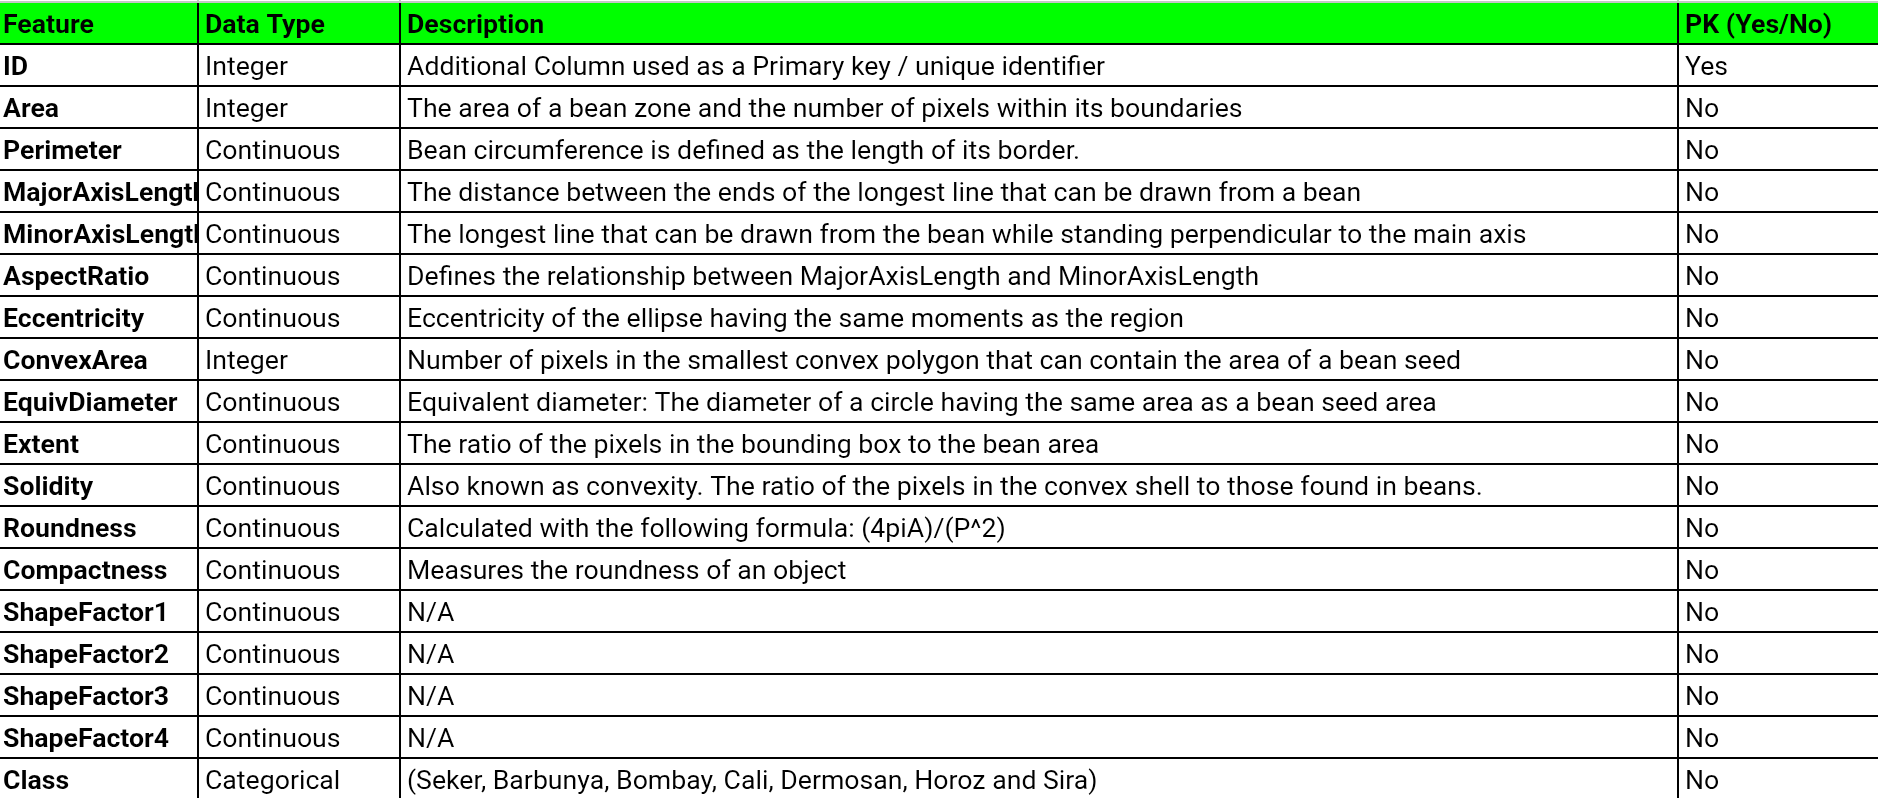

# **1.4 Split dataset for training and Production/Inference dataset**

We split the original Dry Bean dataset into two parts: Training and Production (Inference). Although the dataset contains true class labels, these labels are not used during the clustering model training, since clustering is an unsupervised learning task. The labels are removed before training so the model forms clusters purely based on feature patterns.

For the Production dataset, we also generate cluster predictions. Even though unsupervised models typically cannot be evaluated using accuracy or label-based metrics, in our case we use the true labels only for internal reference—to check how well the trained clusters align with the actual classes. This comparison is not part of the official clustering workflow.

For the actual and valid clustering evaluation, we rely on unsupervised metrics such as Davies–Bouldin Score, Silhouette Score, and visual assessments using scatter plots, which help us verify how well the model generalizes and separates clusters in feature space.





In [6]:
# --- Import library ---
from sklearn.model_selection import train_test_split

df = pd.read_csv(f"{full_data_path}/Bean_Data_Full.csv")

# --- Ensure the ID column exists ---
df = df.reset_index(drop=True)
df['ID'] = df.index + 1  # unique ID starting from 1

# --- Split dataset: 75% for training/fitting, 25% for production/inference ---
df_train, df_eval = train_test_split(df, test_size=0.25, random_state=42, shuffle=True)

# --- Reset index for clean DataFrames ---
df_train = df_train.reset_index(drop=True)
df_eval = df_eval.reset_index(drop=True)

# --- Optional: print shapes ---
print("Train/Fit dataset shape (75%):", df_train.shape)
print("Production/Inference dataset shape (25%):", df_eval.shape)

# --- Save datasets for reproducibility ---
df_train.to_csv(f"{full_data_path}/Bean_Data_75pct.csv", index=False)
df_eval.to_csv(f"{full_data_path}/Bean_Data_25pct_Eval_Inf.csv", index=False)

print("75% / 25% split done and saved.")

Train/Fit dataset shape (75%): (10208, 18)
Production/Inference dataset shape (25%): (3403, 18)
75% / 25% split done and saved.


# **2. Phase II - Preprocessing & Feature Engineering**

## **2.1 EDA on raw data**

In [7]:
df_train = pd.read_csv(f"{full_data_path}/Bean_Data_75pct.csv")


df_train = df_train.drop(columns=['ID','Class'], axis=1)

numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns

# Dataset info
print("==============Info==============")
print(df_train.info())

# Shape
print("==============Shape==============")
print("Shape:", df_train.shape)

# Quick peek at the first rows
print("==============Head==============")
print(df_train.head())

# Summary statistics for numeric features
print("==============Describe==============")
print(df_train.describe())

# Check Missing Values
print("==============Missing==============")
missing_count = df_train.isnull().sum()
missing_percent = (missing_count / len(df_train)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_count,
    'Missing %': missing_percent.round(2)
})
display(missing_df.sort_values(by='Missing %', ascending=False))

# Check Duplicates Values
print("==============Duplicates==============")
print("Duplicate rows:", df_train.duplicated().sum())

# Check Negative Values
print("==============Check Negative Values==============")
print("Check Negative Values: ",(df_train < 0).sum())

# Summary statistics for numeric features
print("============== Summary Statistics ==============")
display(df_train[numeric_cols].describe().T)

# Quantiles (25th, 50th, 75th)
print("\n============== Feature Quantiles (25%, 50%, 75%) ==============")
display(df_train[numeric_cols].quantile([0.25, 0.5, 0.75]).T)

# Correlation matrix
print("\n============== Correlation Matrix ==============")
corr_matrix = df_train[numeric_cols].corr()
display(corr_matrix.round(3))



==============Info==============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10208 entries, 0 to 10207
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10208 non-null  int64  
 1   Perimeter        10208 non-null  float64
 2   MajorAxisLength  10208 non-null  float64
 3   MinorAxisLength  10208 non-null  float64
 4   AspectRatio      10208 non-null  float64
 5   Eccentricity     10208 non-null  float64
 6   ConvexArea       10208 non-null  int64  
 7   EquivDiameter    10208 non-null  float64
 8   Extent           10208 non-null  float64
 9   Solidity         10208 non-null  float64
 10  Roundness        10208 non-null  float64
 11  Compactness      10208 non-null  float64
 12  ShapeFactor1     10208 non-null  float64
 13  ShapeFactor2     10208 non-null  float64
 14  ShapeFactor3     10208 non-null  float64
 15  ShapeFactor4     10208 non-null  float64
dtypes: float64(14), int64(2)


Missing Values  Missing %
Area                          0        0.0
Perimeter                     0        0.0
MajorAxisLength               0        0.0
MinorAxisLength               0        0.0
AspectRatio                   0        0.0
Eccentricity                  0        0.0
ConvexArea                    0        0.0
EquivDiameter                 0        0.0
Extent                        0        0.0
Solidity                      0        0.0
Roundness                     0        0.0
Compactness                   0        0.0
ShapeFactor1                  0        0.0
ShapeFactor2                  0        0.0
ShapeFactor3                  0        0.0
ShapeFactor4                  0        0.0

==============Duplicates==============
Duplicate rows: 34
==============Check Negative Values==============
Check Negative Values:  Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRatio        0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
Roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64
============== Summary Statistics ==============


count          mean           std           min  \
Area             10208.0  52869.725803  29134.239678  20420.000000   
Perimeter        10208.0    853.951749    213.490744    524.736000   
MajorAxisLength  10208.0    319.702788     85.529851    183.601165   
MinorAxisLength  10208.0    201.927885     44.663163    122.512653   
AspectRatio      10208.0      1.583590      0.246866      1.024868   
Eccentricity     10208.0      0.751015      0.091894      0.218951   
ConvexArea       10208.0  53586.398805  29580.619457  20684.000000   
EquivDiameter    10208.0    252.676247     58.914174    161.243764   
Extent           10208.0      0.749570      0.049093      0.555315   
Solidity         10208.0      0.987147      0.004662      0.919246   
Roundness        10208.0      0.873319      0.059419      0.489618   
Compactness      10208.0      0.799788      0.061736      0.645368   
ShapeFactor1     10208.0      0.006573      0.001127      0.002778   
ShapeFactor2     10208.0      0.001718      0.000596      0.000567   
ShapeFactor3     10208.0      0.643472      0.099017      0.416499   
ShapeFactor4     10208.0      0.995077      0.004370      0.947687   

                          25%           50%           75%            max  
Area             36234.250000  44559.000000  61116.250000  254616.000000  
Perimeter          702.965000    793.439500    975.935250    1985.370000  
MajorAxisLength    252.950467    296.255634    376.081389     738.860154  
MinorAxisLength    175.452958    192.309031    216.498646     460.198497  
AspectRatio          1.433390      1.551047      1.708493       2.388873  
Eccentricity         0.716442      0.764414      0.810809       0.908167  
ConvexArea       36632.750000  45094.500000  62068.250000  263261.000000  
EquivDiameter      214.790316    238.189590    278.954523     569.374358  
Extent               0.718148      0.759197      0.787076       0.866195  
Solidity             0.985674      0.988283      0.990004       0.994677  
Roundness            0.832592      0.883254      0.917028       0.986812  
Compactness          0.762071      0.801318      0.833829       0.987303  
ShapeFactor1         0.005910      0.006652      0.007286       0.010451  
ShapeFactor2         0.001154      0.001703      0.002171       0.003665  
ShapeFactor3         0.580753      0.642111      0.695271       0.974767  
ShapeFactor4         0.993711      0.996402      0.997891       0.999733


============== Feature Quantiles (25%, 50%, 75%) ==============


0.25          0.50          0.75
Area             36234.250000  44559.000000  61116.250000
Perimeter          702.965000    793.439500    975.935250
MajorAxisLength    252.950467    296.255634    376.081389
MinorAxisLength    175.452958    192.309031    216.498646
AspectRatio          1.433390      1.551047      1.708493
Eccentricity         0.716442      0.764414      0.810809
ConvexArea       36632.750000  45094.500000  62068.250000
EquivDiameter      214.790316    238.189590    278.954523
Extent               0.718148      0.759197      0.787076
Solidity             0.985674      0.988283      0.990004
Roundness            0.832592      0.883254      0.917028
Compactness          0.762071      0.801318      0.833829
ShapeFactor1         0.005910      0.006652      0.007286
ShapeFactor2         0.001154      0.001703      0.002171
ShapeFactor3         0.580753      0.642111      0.695271
ShapeFactor4         0.993711      0.996402      0.997891


============== Correlation Matrix ==============


Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000      0.967            0.932            0.951   
Perimeter        0.967      1.000            0.977            0.913   
MajorAxisLength  0.932      0.977            1.000            0.825   
MinorAxisLength  0.951      0.913            0.825            1.000   
AspectRatio      0.246      0.389            0.554           -0.006   
Eccentricity     0.271      0.393            0.545            0.021   
ConvexArea       1.000      0.968            0.933            0.951   
EquivDiameter    0.985      0.991            0.962            0.948   
Extent           0.056     -0.020           -0.077            0.148   
Solidity        -0.193     -0.300           -0.279           -0.153   
Roundness       -0.361     -0.550           -0.598           -0.213   
Compactness     -0.272     -0.410           -0.572           -0.018   
ShapeFactor1    -0.847     -0.864           -0.772           -0.947   
ShapeFactor2    -0.641     -0.768           -0.860           -0.472   
ShapeFactor3    -0.276     -0.411           -0.571           -0.022   
ShapeFactor4    -0.357     -0.431           -0.484           -0.265   

                 AspectRatio  Eccentricity  ConvexArea  EquivDiameter  Extent  \
Area                   0.246         0.271       1.000          0.985   0.056   
Perimeter              0.389         0.393       0.968          0.991  -0.020   
MajorAxisLength        0.554         0.545       0.933          0.962  -0.077   
MinorAxisLength       -0.006         0.021       0.951          0.948   0.148   
AspectRatio            1.000         0.925       0.248          0.308  -0.372   
Eccentricity           0.925         1.000       0.273          0.322  -0.322   
ConvexArea             0.248         0.273       1.000          0.985   0.054   
EquivDiameter          0.308         0.322       0.985          1.000   0.030   
Extent                -0.372        -0.322       0.054          0.030   1.000   
Solidity              -0.262        -0.292      -0.203         -0.227   0.186   
Roundness             -0.765        -0.720      -0.365         -0.439   0.347   
Compactness           -0.988        -0.971      -0.274         -0.331   0.356   
ShapeFactor1           0.023         0.019      -0.847         -0.892  -0.145   
ShapeFactor2          -0.839        -0.861      -0.642         -0.714   0.240   
ShapeFactor3          -0.979        -0.981      -0.278         -0.334   0.350   
ShapeFactor4          -0.449        -0.449      -0.364         -0.394   0.145   

                 Solidity  Roundness  Compactness  ShapeFactor1  ShapeFactor2  \
Area               -0.193     -0.361       -0.272        -0.847        -0.641   
Perimeter          -0.300     -0.550       -0.410        -0.864        -0.768   
MajorAxisLength    -0.279     -0.598       -0.572        -0.772        -0.860   
MinorAxisLength    -0.153     -0.213       -0.018        -0.947        -0.472   
AspectRatio        -0.262     -0.765       -0.988         0.023        -0.839   
Eccentricity       -0.292     -0.720       -0.971         0.019        -0.861   
ConvexArea         -0.203     -0.365       -0.274        -0.847        -0.642   
EquivDiameter      -0.227     -0.439       -0.331        -0.892        -0.714   
Extent              0.186      0.347        0.356        -0.145         0.240   
Solidity            1.000      0.607        0.298         0.149         0.337   
Roundness           0.607      1.000        0.766         0.231         0.781   
Compactness         0.298      0.766        1.000        -0.008         0.870   
ShapeFactor1        0.149      0.231       -0.008         1.000         0.468   
ShapeFactor2        0.337      0.781        0.870         0.468         1.000   
ShapeFactor3        0.302      0.761        0.999        -0.007         0.874   
ShapeFactor4        0.700      0.476        0.484         0.250         0.530   

                 ShapeFactor3  ShapeFactor4  
Area    

Overall Summary of the Raw Data:

The Dry Bean training dataset contains 10,208 rows and 16 numeric features, with no missing values and only 34 duplicate rows, which can be safely removed. All features are non-negative and clean, with strong correlations observed among size-related attributes (Area, Perimeter, MajorAxisLength, ConvexArea, etc.). Several shape descriptors also show high multicollinearity (|corr| > 0.9), confirming the need for dimensionality reduction or feature filtering before clustering. Overall, the dataset is well-structured and ready for preprocessing.

## Univariate Analysis before data cleaning

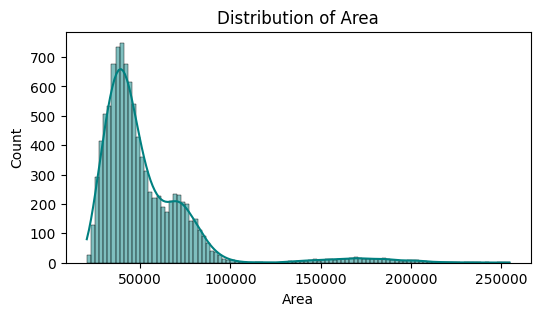

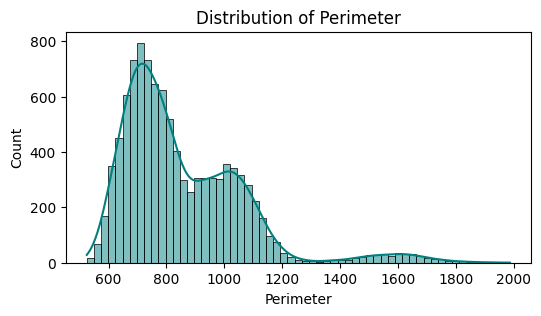

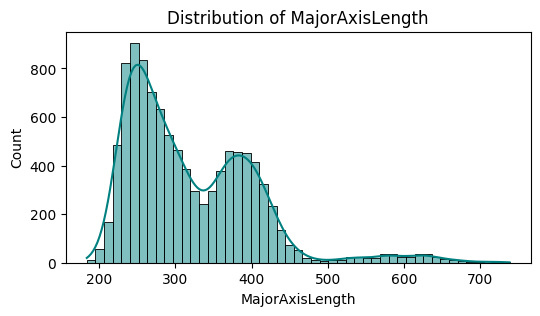

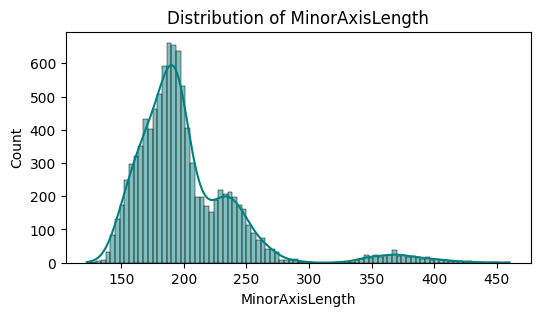

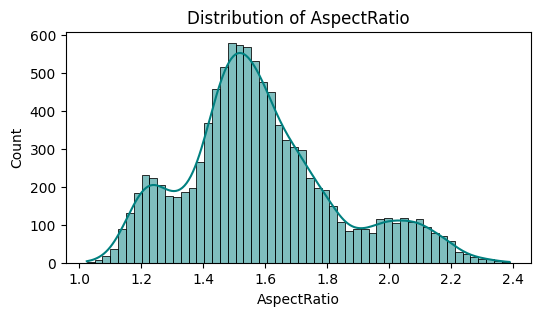

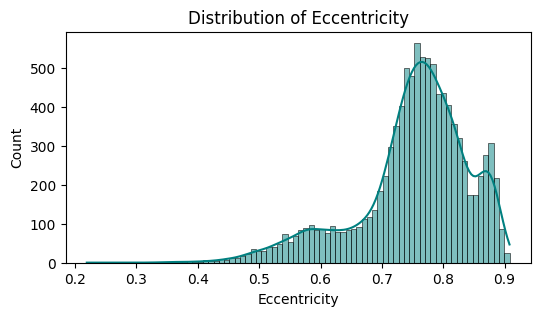

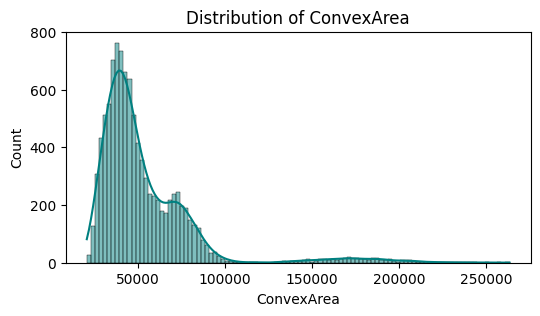

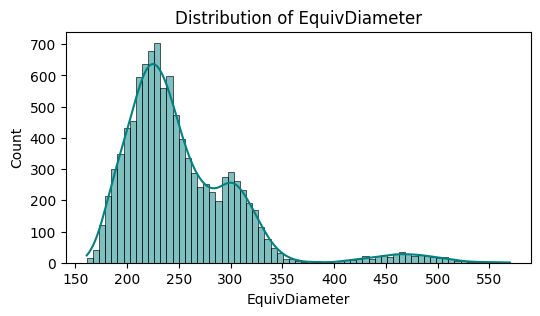

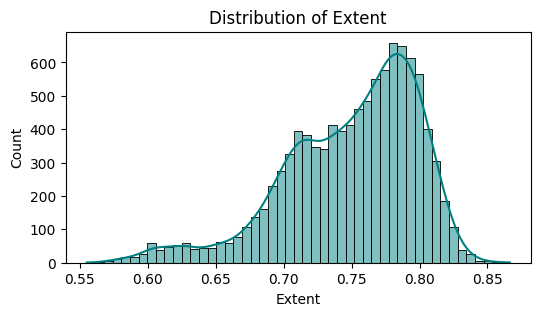

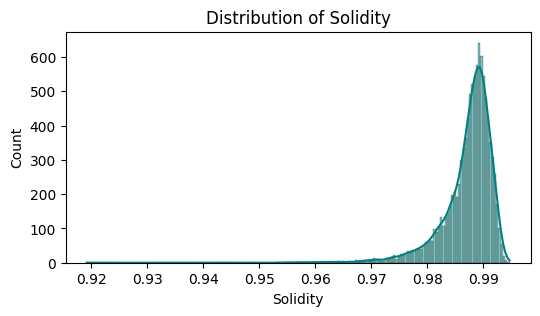

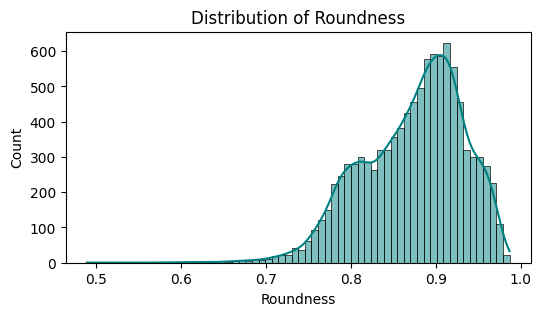

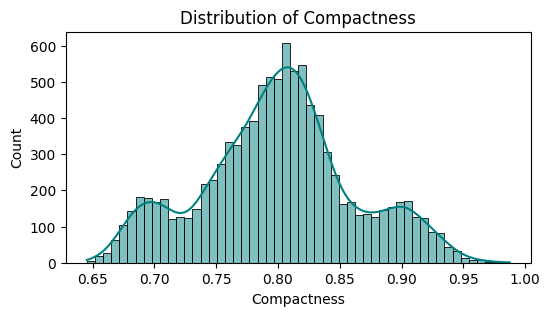

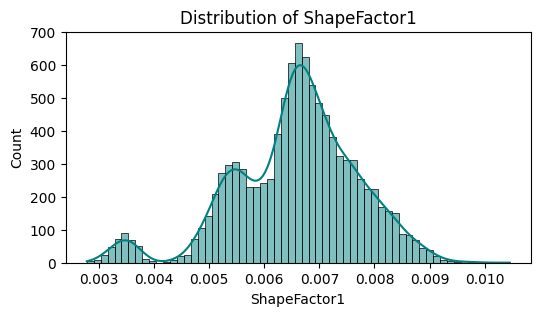

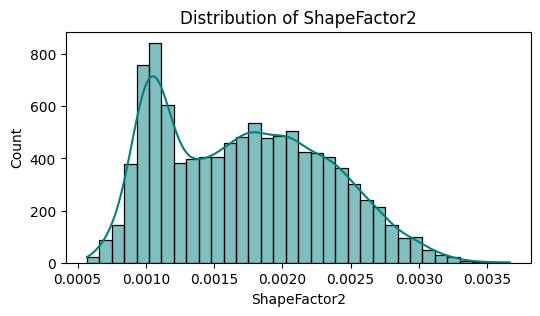

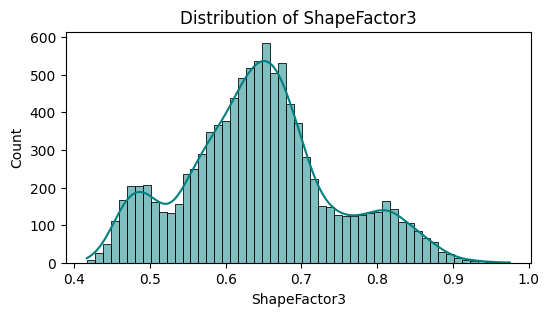

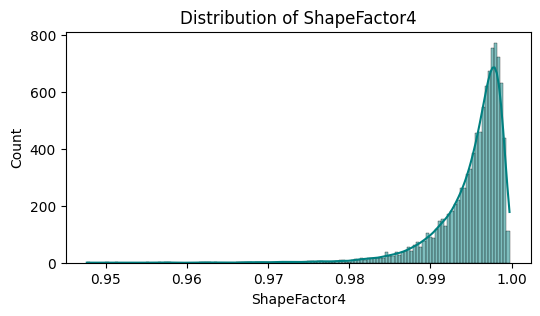

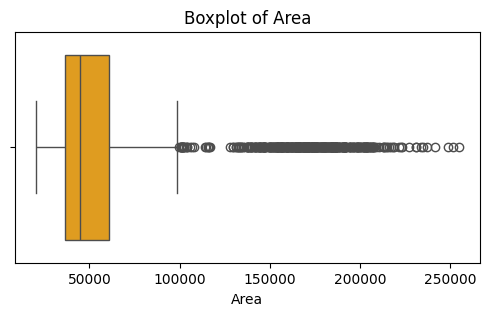

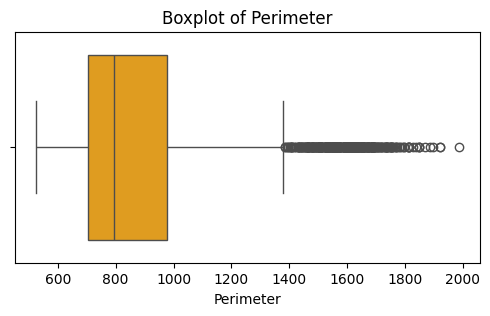

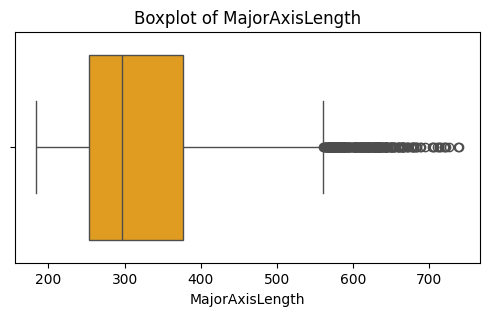

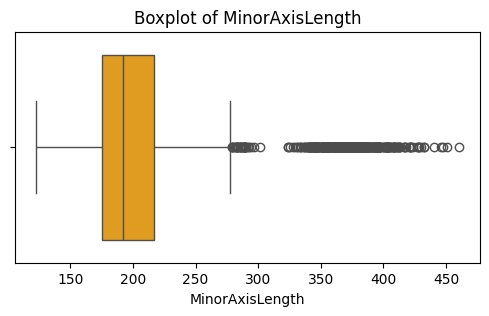

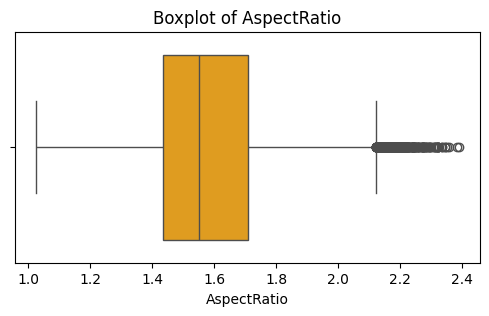

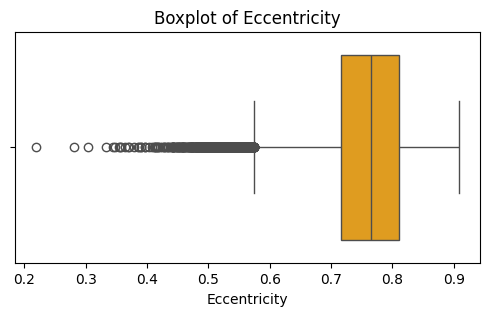

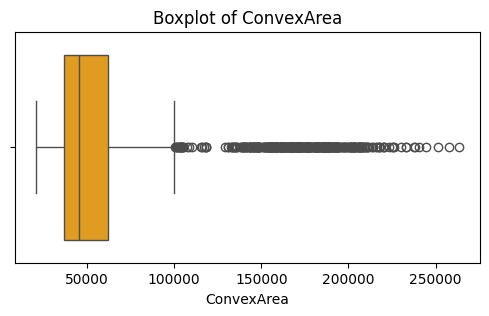

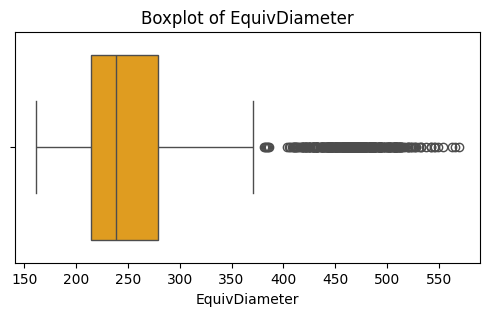

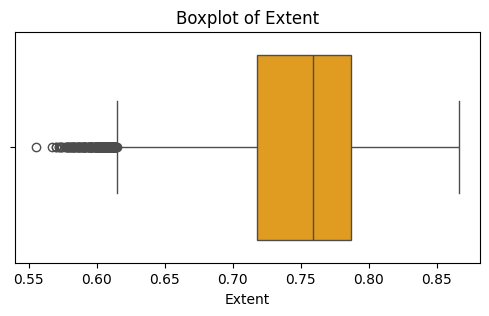

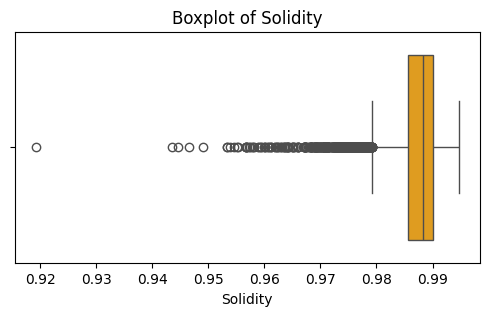

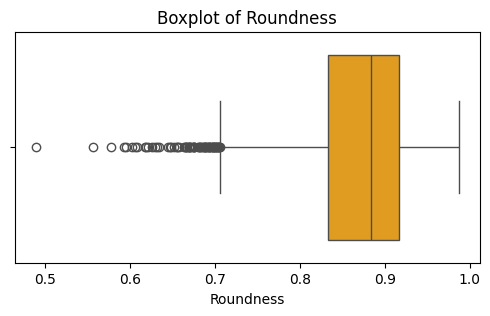

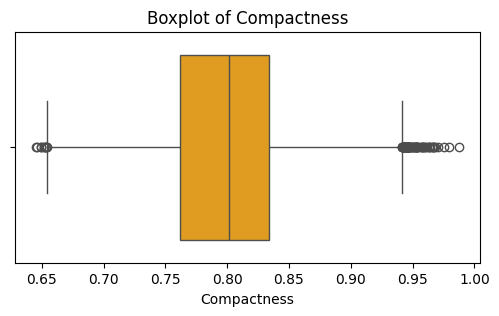

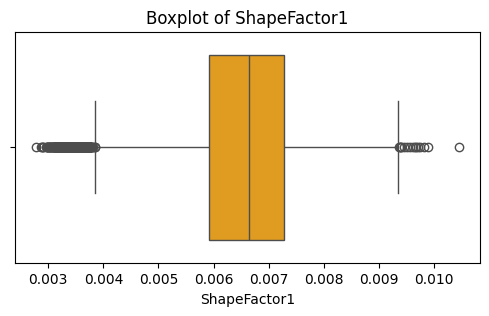

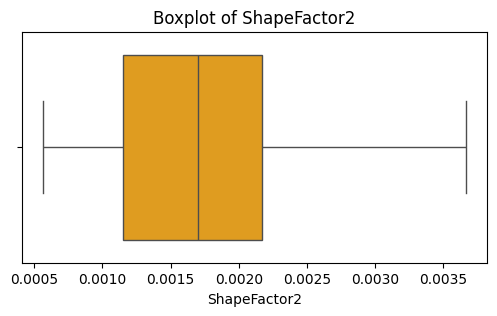

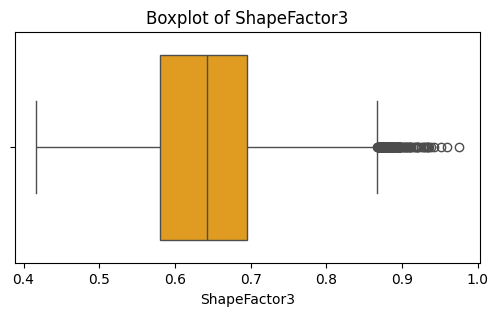

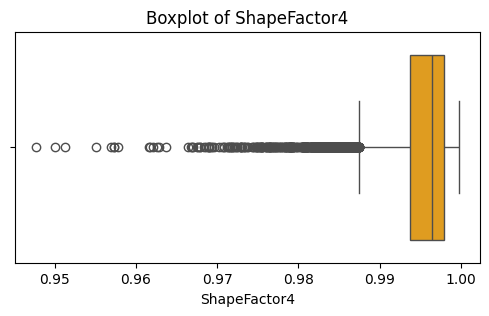

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


# Histograms and KDE
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df_train[col], kde=True, color='teal')
    plt.title(f'Distribution of {col}')
    plt.show()

# Boxplots for outliers
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df_train[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.show()


Summary of Univariate Analysis before data cleaning:

The univariate analysis shows that most features are right-skewed with several natural outliers, especially in size-related variables like Area, Perimeter, ConvexArea, and axis lengths. Shape-based features (Compactness, Aspect Ratio, ShapeFactor1/2/3) appear smoother and more normally distributed. Many histograms show multi-modal patterns, indicating natural sub-groups in the data. Feature scales vary widely, confirming the need for standardization before clustering.

## Multivariate Analysis before data cleaning

In [9]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_train[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Pairplot (sample for speed)
sns.pairplot(df_train.sample(1000), diag_kind='kde', corner=True)
plt.suptitle('Pairwise Relationships (sampled)', y=1.02)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Summary of Multivariate Analysis before data cleaning:

The multivaraite analysis shows very strong correlations among all size-related features such as Area, Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea, and EquivDiameter, indicating that they essentially capture the same underlying property (bean size). Shape-based features—Compactness, Roundness, Solidity, Eccentricity, AspectRatio, ShapeFactor1–4—also show strong relationships among themselves. This confirms the presence of high multicollinearity, meaning many features are redundant.

The pairplots highlight clear linear and curved patterns between these groups of features, suggesting that the dataset contains natural structure and separability. This justifies applying scaling and dimensionality reduction before clustering, since correlated features can distort distances in K-means.

## PCA Analysis before data cleaning

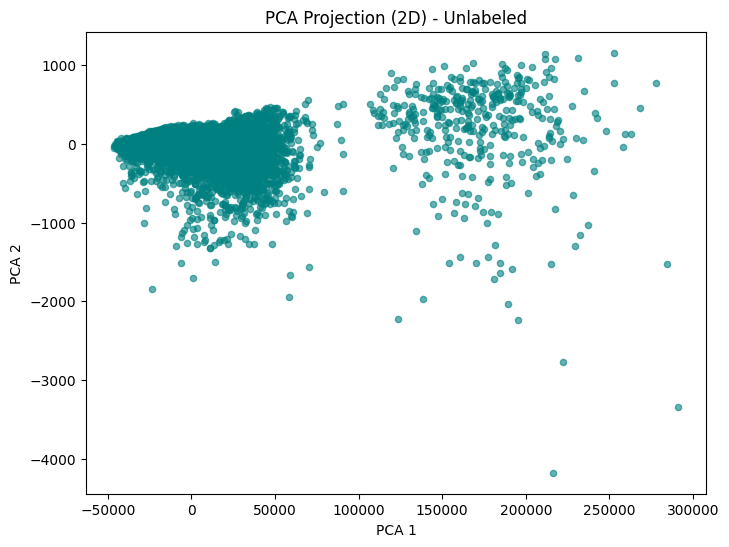

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Features only
X_features = df_train
# PCA projection to 2D
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(pcs[:,0], pcs[:,1], s=20, alpha=0.6, color='teal')
plt.title('PCA Projection (2D) - Unlabeled')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Summary of PCA Analysis before data cleaning:

The PCA projections reveal that the Dry Bean dataset contains clear natural groupings with some overlap between them. The presence of compact clusters indicates that K-Means is a suitable approach, while the scattered points highlight potential outliers. PCA also confirms that most variance is driven by size and shape-related features, validating the feature diversity and supporting our unsupervised clustering workflow.

## **2.2 Data Cleaning**

We clean the dataset by removing duplicates, imputing missing values using median, and filtering extreme outliers using the IQR method to ensure a stable and reliable clustering input.

In [11]:
# Drop duplicates
df_train = df_train.drop_duplicates().reset_index(drop=True)
print("Duplicate rows:", df_train.duplicated().sum())


Duplicate rows: 0


In [12]:
# Handle missing values

df_train.fillna(df_train.median(), inplace=True)

print(df_train.isnull().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRatio        0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
Roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64


For outlier removal, we will use IQR Method instead of
Z-Score Method as the data is not normally distributed (or close to normal). The IQR method, removes a row if any column in that row contains an outlier beyond n×IQR.

In [13]:
# Remove outlier

Q1 = df_train[numeric_cols].quantile(0.25)
Q3 = df_train[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ((df_train[numeric_cols] < (Q1 - 3*IQR)) |
                (df_train[numeric_cols] > (Q3 + 3*IQR))).any(axis=1)
print("Outliers to remove:", outlier_mask.sum())

df_train_cleaned = df_train[~outlier_mask].reset_index(drop=True)

print(df_train_cleaned.head())

Outliers to remove: 608
    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0  54113    872.821       327.629922       210.782841     1.554348   
1  24417    606.972       237.334604       131.433059     1.805745   
2  45147    807.574       309.426123       186.577193     1.658435   
3  51115    855.900       319.231802       204.965007     1.557494   
4  41774    760.786       285.190676       186.969859     1.525330   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundness  \
0      0.765567       54651     262.485831  0.717755  0.990156   0.892609   
1      0.832658       24738     176.319851  0.755523  0.987024   0.832846   
2      0.797758       45655     239.756013  0.788980  0.988873   0.869910   
3      0.766657       51641     255.111033  0.680010  0.989814   0.876823   
4      0.755112       42202     230.625907  0.713171  0.989858   0.906966   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     0.801166     

## **2.3 EDA After Cleaned**

In [14]:
# Info
print("==============Info===========")
print(df_train_cleaned.info())

# Shape
print("==============Shape===========")
print("Shape:", df_train_cleaned.shape)

# Quick peek at the first rows
print("==============Head===========")
print(df_train_cleaned.head())

# Summary statistics for numeric features
print("==============Describe===========")
print(df_train_cleaned.describe())

# Missing values
print("==============Missing===========")
missing_count = df_train_cleaned.isnull().sum()
missing_percent = (missing_count / len(df_train_cleaned)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_count,
    'Missing %': missing_percent.round(2)
})
display(missing_df.sort_values(by='Missing %', ascending=False))

# Duplicates
print("==============Duplicates===========")
print("Duplicate rows:", df_train_cleaned.duplicated().sum())

# Check Negative Values
print("==============Check Negative Values===========")
print("Check Negative Values: ",(df_train_cleaned < 0).sum())

# Summary statistics for numeric features
print("=== Summary Statistics ===")
display(df_train_cleaned[numeric_cols].describe().T)

# Quantiles (25th, 50th, 75th)
print("\n=== Feature Quantiles (25%, 50%, 75%) ===")
display(df_train_cleaned[numeric_cols].quantile([0.25, 0.5, 0.75]).T)

# Correlation matrix
print("\n=== Correlation Matrix ===")
corr_matrix = df_train_cleaned[numeric_cols].corr()
display(corr_matrix.round(3))



==============Info===========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9566 entries, 0 to 9565
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             9566 non-null   int64  
 1   Perimeter        9566 non-null   float64
 2   MajorAxisLength  9566 non-null   float64
 3   MinorAxisLength  9566 non-null   float64
 4   AspectRatio      9566 non-null   float64
 5   Eccentricity     9566 non-null   float64
 6   ConvexArea       9566 non-null   int64  
 7   EquivDiameter    9566 non-null   float64
 8   Extent           9566 non-null   float64
 9   Solidity         9566 non-null   float64
 10  Roundness        9566 non-null   float64
 11  Compactness      9566 non-null   float64
 12  ShapeFactor1     9566 non-null   float64
 13  ShapeFactor2     9566 non-null   float64
 14  ShapeFactor3     9566 non-null   float64
 15  ShapeFactor4     9566 non-null   float64
dtypes: float64(14), int64(2)
memor

Missing Values  Missing %
Area                          0        0.0
Perimeter                     0        0.0
MajorAxisLength               0        0.0
MinorAxisLength               0        0.0
AspectRatio                   0        0.0
Eccentricity                  0        0.0
ConvexArea                    0        0.0
EquivDiameter                 0        0.0
Extent                        0        0.0
Solidity                      0        0.0
Roundness                     0        0.0
Compactness                   0        0.0
ShapeFactor1                  0        0.0
ShapeFactor2                  0        0.0
ShapeFactor3                  0        0.0
ShapeFactor4                  0        0.0

==============Duplicates===========
Duplicate rows: 0
==============Check Negative Values===========
Check Negative Values:  Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRatio        0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
Roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64
=== Summary Statistics ===


count          mean           std           min  \
Area             9566.0  48067.747752  16679.972401  20420.000000   
Perimeter        9566.0    823.223379    159.025689    524.736000   
MajorAxisLength  9566.0    308.128927     66.567934    183.601165   
MinorAxisLength  9566.0    195.169928     29.619762    122.512653   
AspectRatio      9566.0      1.579223      0.247152      1.110108   
Eccentricity     9566.0      0.749653      0.090708      0.434207   
ConvexArea       9566.0  48697.533452  16980.453941  20684.000000   
EquivDiameter    9566.0    243.928709     41.239786    161.243764   
Extent           9566.0      0.749032      0.048851      0.555315   
Solidity         9566.0      0.987548      0.003648      0.972790   
Roundness        9566.0      0.875793      0.058340      0.617409   
Compactness      9566.0      0.801084      0.061549      0.645368   
ShapeFactor1     9566.0      0.006697      0.000967      0.003760   
ShapeFactor2     9566.0      0.001759      0.000573      0.000762   
ShapeFactor3     9566.0      0.645523      0.098630      0.416499   
ShapeFactor4     9566.0      0.995554      0.003317      0.981204   

                          25%           50%           75%            max  
Area             35795.000000  43634.000000  57759.750000  134251.000000  
Perimeter          698.589750    782.647000    949.639250    1391.532000  
MajorAxisLength    251.568371    290.274182    367.909227     534.484404  
MinorAxisLength    174.405455    190.996412    210.665575     339.906839  
AspectRatio          1.427497      1.545031      1.702477       2.388873  
Eccentricity         0.713626      0.762289      0.809312       0.908167  
ConvexArea       36169.750000  44126.500000  58488.000000  135500.000000  
EquivDiameter      213.484448    235.704337    271.186278     413.441268  
Extent               0.717757      0.758489      0.786437       0.866195  
Solidity             0.985953      0.988359      0.990035       0.994378  
Roundness            0.835484      0.886489      0.918792       0.986812  
Compactness          0.763925      0.803214      0.835526       0.948189  
ShapeFactor1         0.006062      0.006693      0.007329       0.010451  
ShapeFactor2         0.001220      0.001751      0.002199       0.003470  
ShapeFactor3         0.583582      0.645153      0.698103       0.899063  
ShapeFactor4         0.994143      0.996569      0.997953       0.999733


=== Feature Quantiles (25%, 50%, 75%) ===


0.25          0.50          0.75
Area             35795.000000  43634.000000  57759.750000
Perimeter          698.589750    782.647000    949.639250
MajorAxisLength    251.568371    290.274182    367.909227
MinorAxisLength    174.405455    190.996412    210.665575
AspectRatio          1.427497      1.545031      1.702477
Eccentricity         0.713626      0.762289      0.809312
ConvexArea       36169.750000  44126.500000  58488.000000
EquivDiameter      213.484448    235.704337    271.186278
Extent               0.717757      0.758489      0.786437
Solidity             0.985953      0.988359      0.990035
Roundness            0.835484      0.886489      0.918792
Compactness          0.763925      0.803214      0.835526
ShapeFactor1         0.006062      0.006693      0.007329
ShapeFactor2         0.001220      0.001751      0.002199
ShapeFactor3         0.583582      0.645153      0.698103
ShapeFactor4         0.994143      0.996569      0.997953


=== Correlation Matrix ===


Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000      0.984            0.937            0.893   
Perimeter        0.984      1.000            0.964            0.842   
MajorAxisLength  0.937      0.964            1.000            0.696   
MinorAxisLength  0.893      0.842            0.696            1.000   
AspectRatio      0.419      0.516            0.705           -0.012   
Eccentricity     0.408      0.490            0.664           -0.015   
ConvexArea       1.000      0.985            0.937            0.893   
EquivDiameter    0.996      0.989            0.944            0.893   
Extent          -0.060     -0.124           -0.190            0.103   
Solidity        -0.367     -0.432           -0.377           -0.269   
Roundness       -0.610     -0.728           -0.765           -0.312   
Compactness     -0.434     -0.525           -0.710            0.001   
ShapeFactor1    -0.855     -0.814           -0.672           -0.982   
ShapeFactor2    -0.750     -0.817           -0.918           -0.417   
ShapeFactor3    -0.433     -0.522           -0.705            0.001   
ShapeFactor4    -0.487     -0.512           -0.576           -0.287   

                 AspectRatio  Eccentricity  ConvexArea  EquivDiameter  Extent  \
Area                   0.419         0.408       1.000          0.996  -0.060   
Perimeter              0.516         0.490       0.985          0.989  -0.124   
MajorAxisLength        0.705         0.664       0.937          0.944  -0.190   
MinorAxisLength       -0.012        -0.015       0.893          0.893   0.103   
AspectRatio            1.000         0.929       0.419          0.435  -0.380   
Eccentricity           0.929         1.000       0.409          0.416  -0.335   
ConvexArea             0.419         0.409       1.000          0.996  -0.061   
EquivDiameter          0.435         0.416       0.996          1.000  -0.071   
Extent                -0.380        -0.335      -0.061         -0.071   1.000   
Solidity              -0.260        -0.313      -0.378         -0.360   0.184   
Roundness             -0.777        -0.739      -0.614         -0.622   0.350   
Compactness           -0.988        -0.973      -0.435         -0.447   0.365   
ShapeFactor1           0.026         0.048      -0.854         -0.869  -0.104   
ShapeFactor2          -0.873        -0.885      -0.751         -0.769   0.285   
ShapeFactor3          -0.979        -0.983      -0.434         -0.445   0.360   
ShapeFactor4          -0.504        -0.509      -0.492         -0.488   0.159   

                 Solidity  Roundness  Compactness  ShapeFactor1  ShapeFactor2  \
Area               -0.367     -0.610       -0.434        -0.855        -0.750   
Perimeter          -0.432     -0.728       -0.525        -0.814        -0.817   
MajorAxisLength    -0.377     -0.765       -0.710        -0.672        -0.918   
MinorAxisLength    -0.269     -0.312        0.001        -0.982        -0.417   
AspectRatio        -0.260     -0.777       -0.988         0.026        -0.873   
Eccentricity       -0.313     -0.739       -0.973         0.048        -0.885   
ConvexArea         -0.378     -0.614       -0.435        -0.854        -0.751   
EquivDiameter      -0.360     -0.622       -0.447        -0.869        -0.769   
Extent              0.184      0.350        0.365        -0.104         0.285   
Solidity            1.000      0.627        0.297         0.212         0.376   
Roundness           0.627      1.000        0.778         0.275         0.827   
Compactness         0.297      0.778        1.000        -0.023         0.898   
ShapeFactor1        0.212      0.275       -0.023         1.000         0.400   
ShapeFactor2        0.376      0.827        0.898         0.400         1.000   
ShapeFactor3        0.305      0.774        0.999        -0.026         0.901   
ShapeFactor4        0.575      0.499        0.535         0.253         0.584   

                 ShapeFactor3  ShapeFactor4  
Area    

Overall Summary of cleaned data:

After applying data cleaning steps (duplicate removal, missing value handling, and outlier filtering), the final dataset contains 9,566 records and 16 numerical features. The dataset is fully clean with:

- 0 missing values

- 0 duplicate rows

- No negative values

- All features are numeric (14 floats + 2 integers)


The summary statistics show that the features are well-distributed, and key descriptive metrics (mean, std, min/max, quartiles) fall within expected ranges for the Dry Bean dataset. The correlation matrix still indicates strong multicollinearity among size-related features, while shape-based features form another correlated group. This confirms that dimensionality reduction or feature selection will be useful for clustering.

## Univariate Analysis after data cleaning

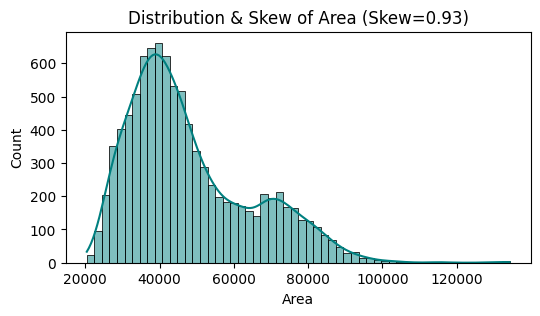

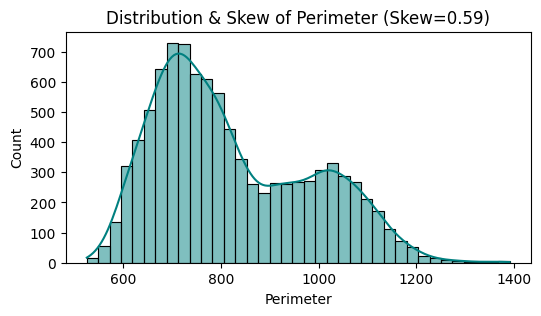

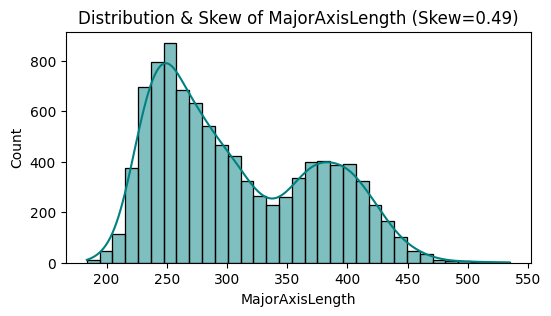

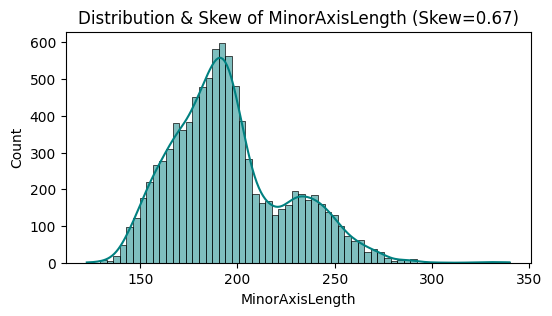

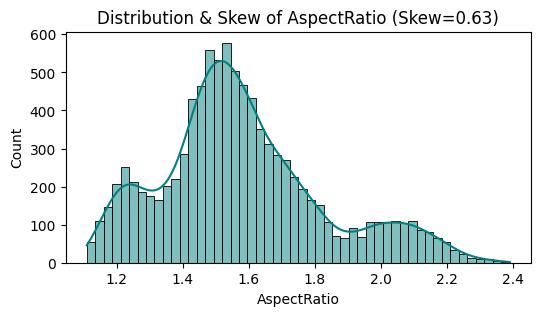

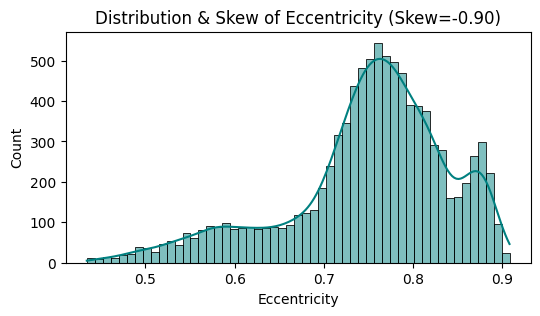

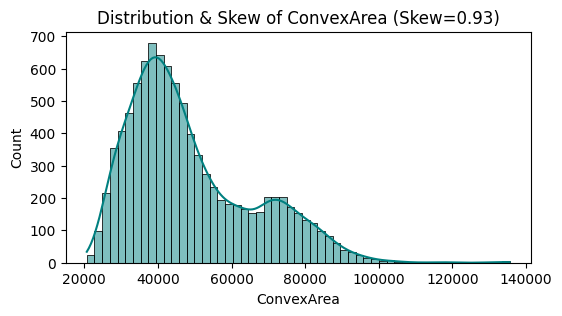

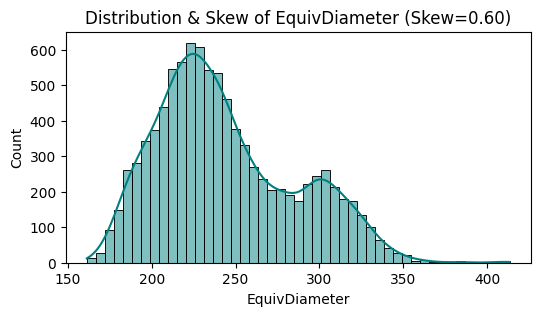

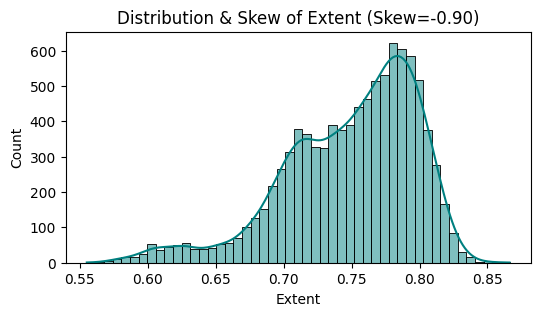

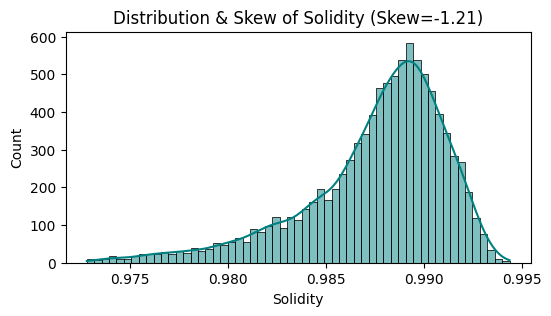

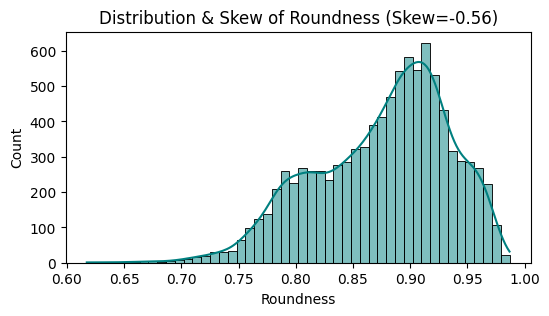

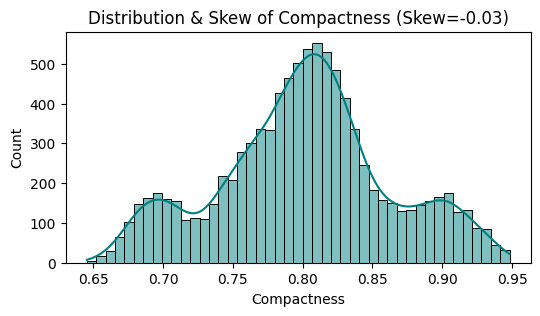

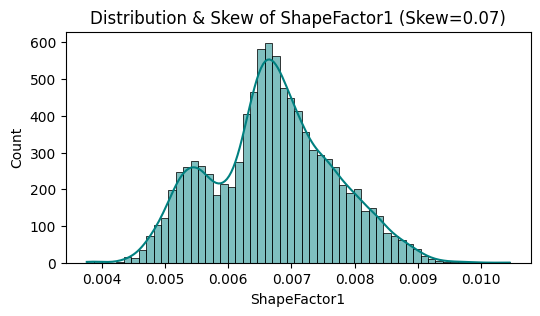

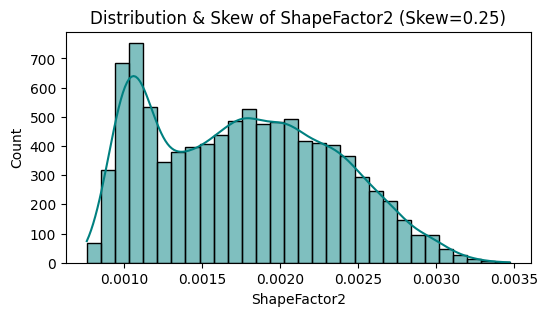

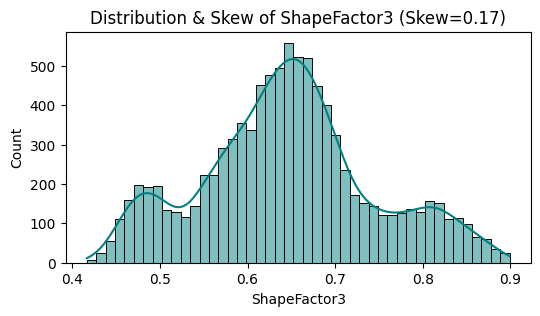

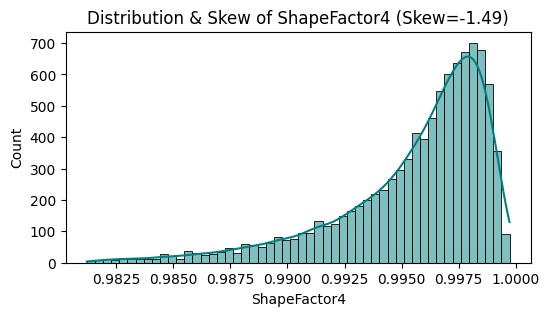

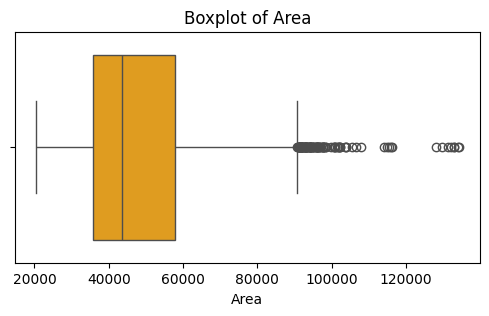

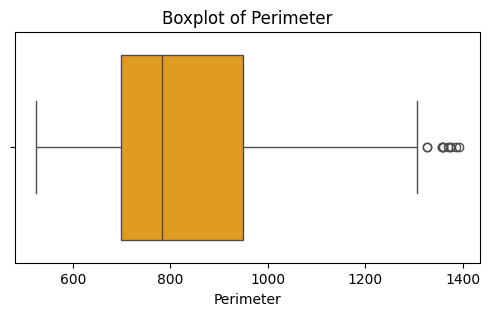

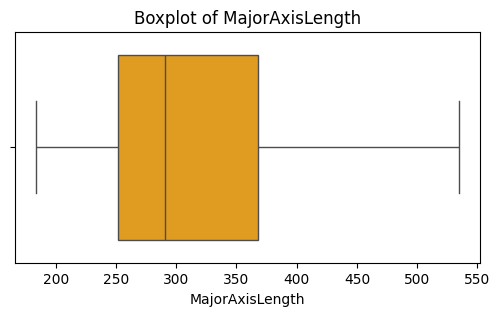

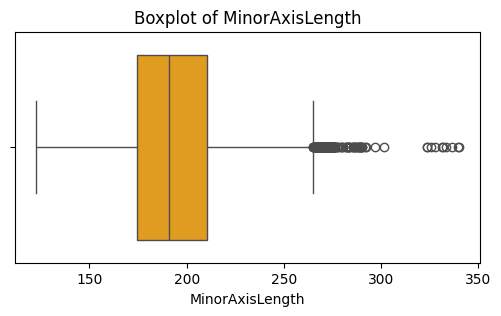

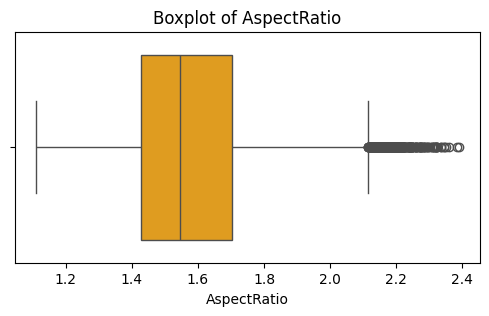

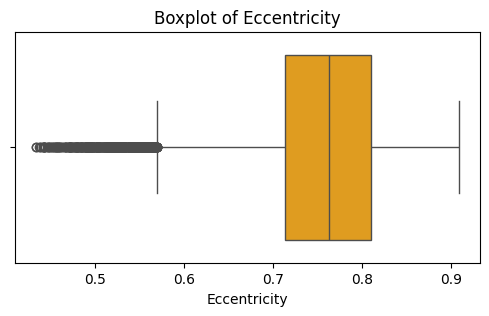

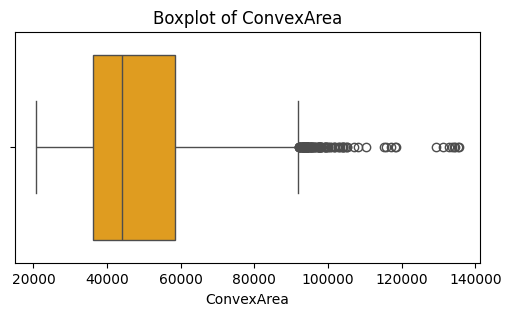

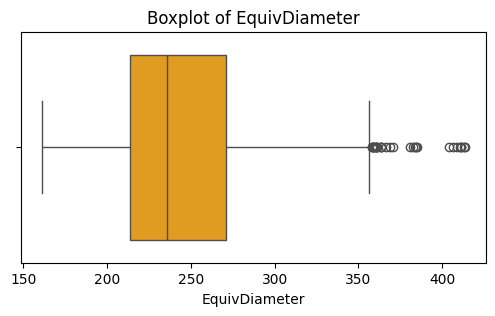

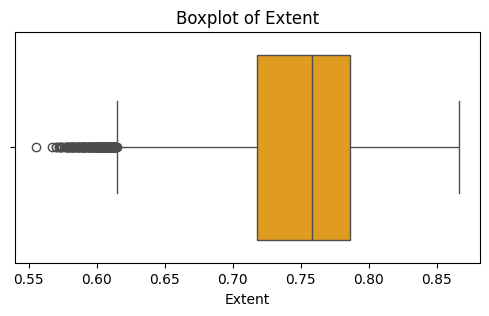

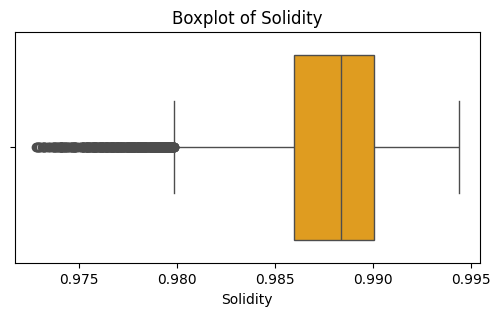

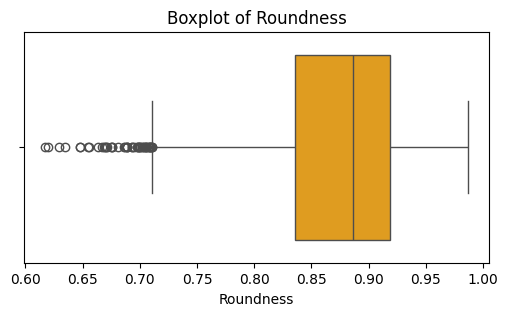

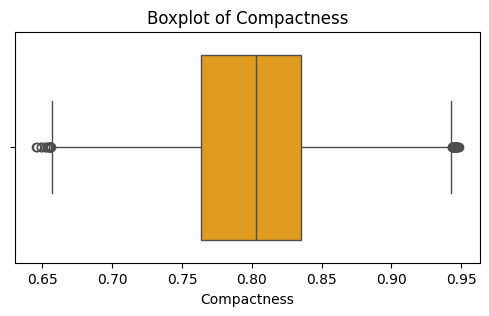

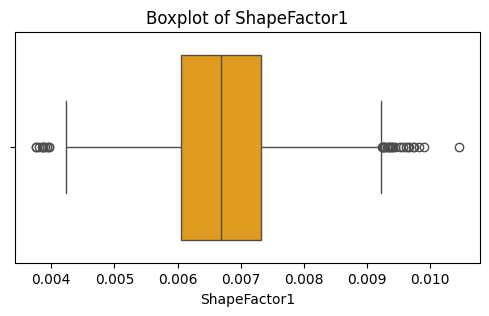

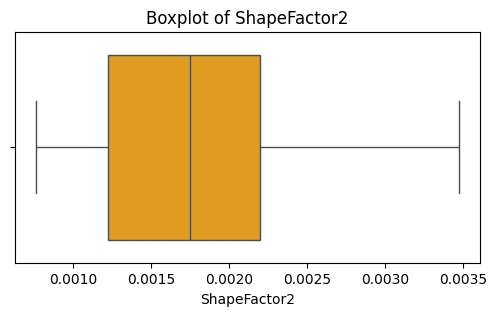

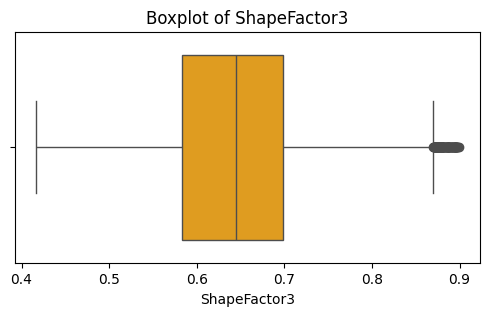

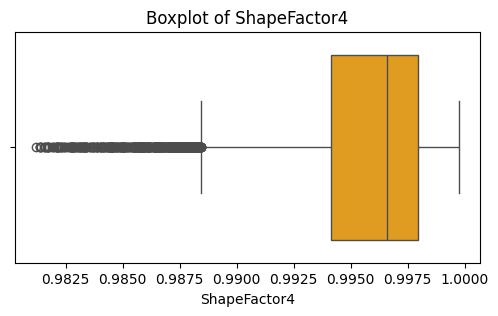

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


# Histograms and KDE
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df_train_cleaned[col], kde=True, color='teal')
    plt.title(f'Distribution & Skew of {col} (Skew={df_train_cleaned[col].skew():.2f})')
    plt.show()

# Boxplots for outliers
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df_train_cleaned[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.show()

Summary of Univariate Analysis after data cleaning:

After data cleaning, the univariate analysis shows that most structural features such as Area, ConvexArea, Perimeter, MajorAxisLength, and MinorAxisLength remain right-skewed, reflecting natural size variation among beans. Shape-based attributes like AspectRatio, Eccentricity, Roundness, and Extent show smooth, mildly skewed distributions, indicating consistent geometric patterns across samples. Features such as Solidity and ShapeFactor4 are tightly concentrated at high values, confirming that beans generally have compact, well-defined shapes. Overall, the cleaned dataset now exhibits stable and meaningful distributions with minimal extreme outliers, making it suitable for reliable clustering.

## Multivariate Analysis after data cleaning

In [17]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_train_cleaned[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Pairplot (sample for speed)
sns.pairplot(df_train_cleaned.sample(1000), diag_kind='kde', corner=True)
plt.suptitle('Pairwise Relationships (sampled)', y=1.02)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Summary of Multivariate Analysis before data cleaning:

The multivaraite analysis shows very strong correlations among all size-related features such as Area, Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea, and EquivDiameter, indicating that they essentially capture the same underlying property (bean size). Shape-based features—Compactness, Roundness, Solidity, Eccentricity, AspectRatio, ShapeFactor1–4—also show strong relationships among themselves. This confirms the presence of high multicollinearity, meaning many features are redundant.

The pairplots highlight clear linear and curved patterns between these groups of features, suggesting that the dataset contains natural structure and separability. This justifies applying scaling and dimensionality reduction before clustering, since correlated features can distort distances in K-means.

## PCA Analysis after data cleaning

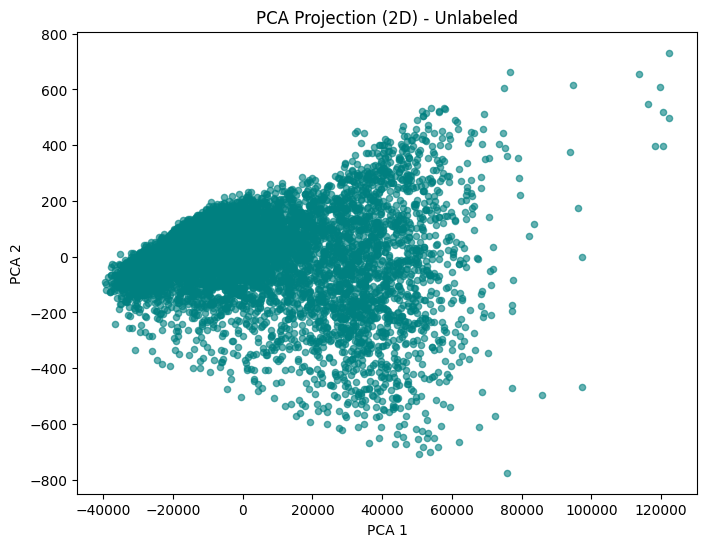

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Features only
X_features = df_train_cleaned
# PCA projection to 2D
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(pcs[:,0], pcs[:,1], s=20, alpha=0.6, color='teal')
plt.title('PCA Projection (2D) - Unlabeled')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Summary of PCA Analysis after data cleaning:

After cleaning the data, PCA projections appear more compact with fewer extreme points, indicating that outlier removal improved the overall structure. However, the dataset still shows a high degree of overlap. This is expected because Dry Bean features are highly correlated and non-linear in nature, and PCA (a linear method) cannot fully separate the inherent groups. The PCA results still confirm that dimensionality reduction is helpful for visualization but cannot reveal clear cluster boundaries on its own.

## **2.4 Feature Engineering**

## 2.4.1 Reduce Skewness and Transform Features

In [19]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
import pandas as pd

# Power Transform (Yeo-Johnson) to reduce skewness
pt = PowerTransformer(method='yeo-johnson')
X_powered = pt.fit_transform(df_train_cleaned)

# Standardize the transformed features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_powered)

# Convert back to DataFrame with original column names
df_scaled = pd.DataFrame(X_scaled, columns=df_train_cleaned.columns)

print("Power-transformed and standardized data ready.")

Power-transformed and standardized data ready.


Since clustering is distance-based and our dataset is mostly positively skewed, using simple log or MinMax scaling would not normalize the distributions enough and would distort cluster distances.
I used Yeo–Johnson because it handles skewness better than log and works even with zeros and different distributions across features.
After that, I applied StandardScaler to ensure all features contribute equally to Euclidean distance.
This combination is recommended for clustering with skewed numerical data.

In short, I evaluated alternative scalers such as Log transform, MinMax, Robust, and QuantileTransform, but PowerTransformer (Yeo-Johnson) followed by StandardScaler provides the best balance for clustering because it handles skewness, preserves feature relationships, and scales features appropriately for distance-based algorithms.

Note: No new features are created during feature engineering as the existing features are sufficient for model development.

In [28]:
df_scaled.std()

Area               1.000052
Perimeter          1.000052
MajorAxisLength    1.000052
MinorAxisLength    1.000052
AspectRatio        1.000052
Eccentricity       1.000052
ConvexArea         1.000052
EquivDiameter      1.000052
Extent             1.000052
Solidity           1.000052
Roundness          1.000052
Compactness        1.000052
ShapeFactor1       1.000052
ShapeFactor2       1.000052
ShapeFactor3       1.000052
ShapeFactor4       1.000052
dtype: float64

As expected, all features now have a standard deviation close to 1, confirming successful normalization. The tiny deviation (≈1.00005) is due to floating-point rounding and the difference between sample vs. population standard deviation.

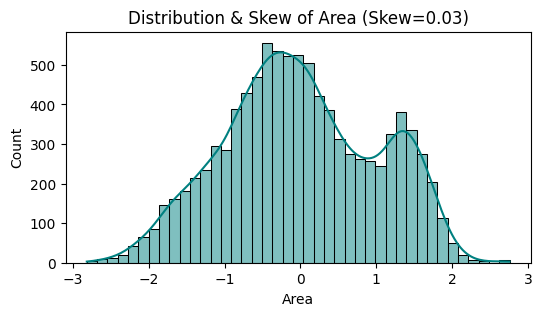

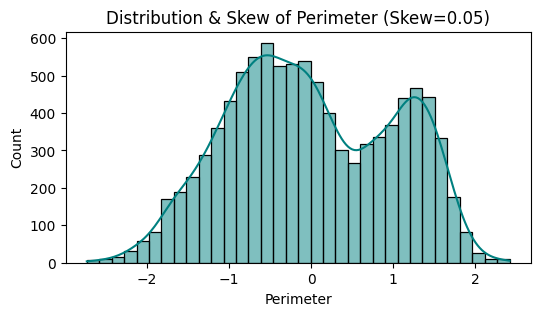

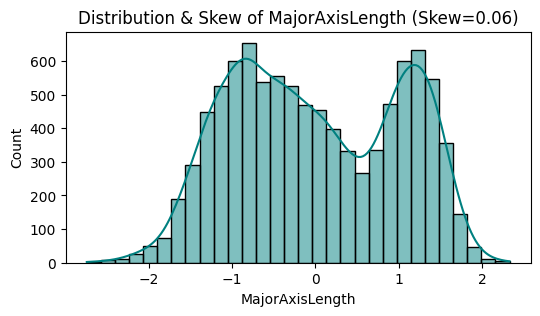

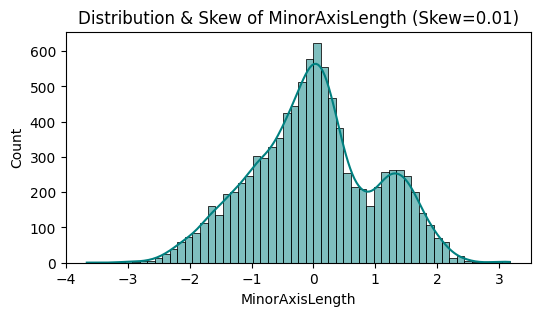

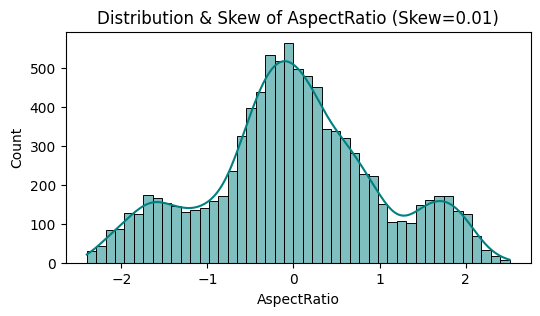

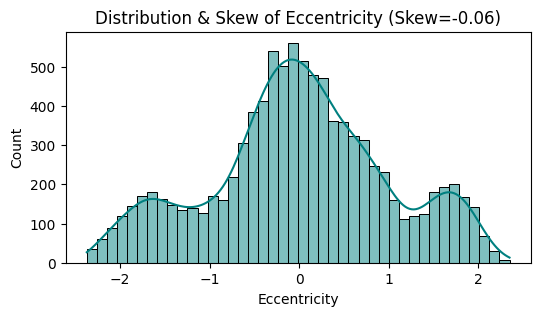

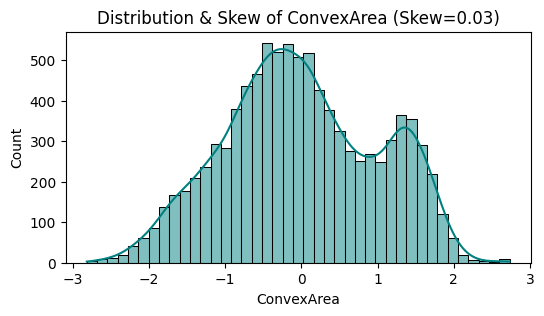

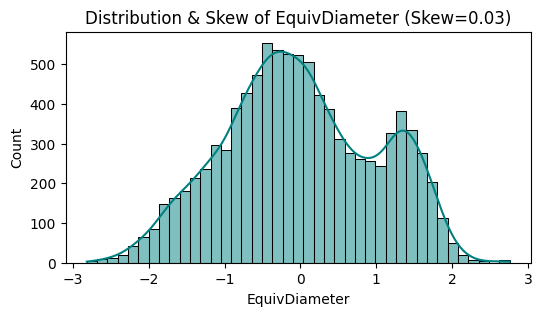

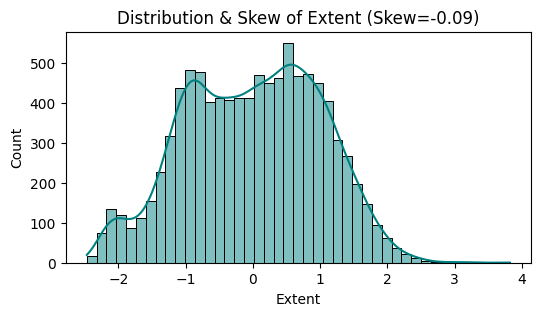

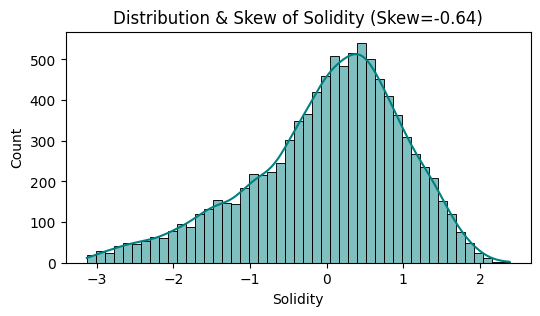

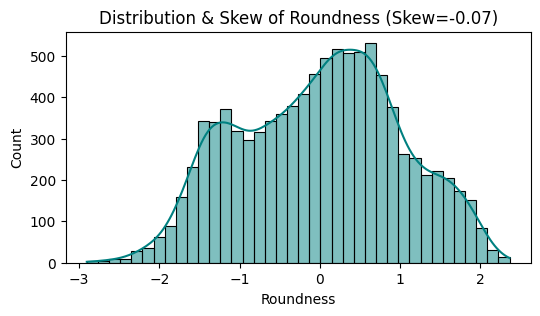

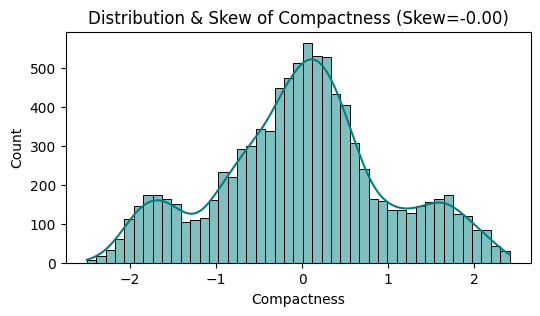

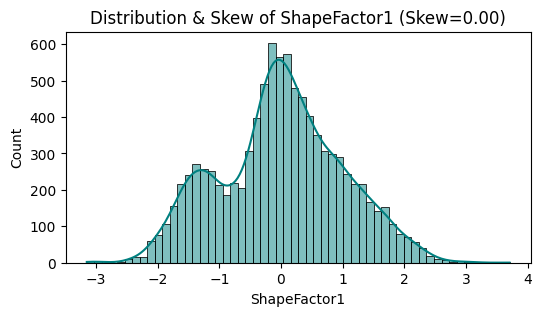

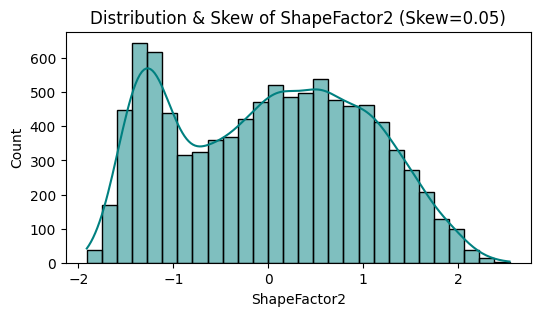

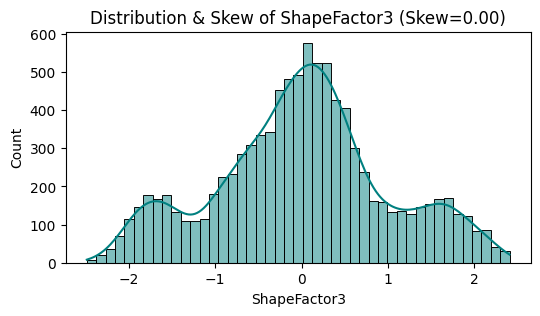

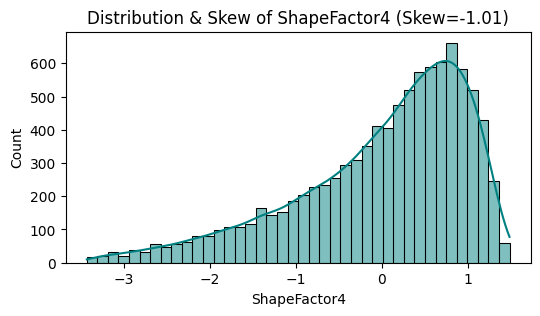

In [20]:
# Final Skew Check
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df_scaled[col], kde=True, color='teal')
    plt.title(f'Distribution & Skew of {col} (Skew={df_scaled[col].skew():.2f})')
    plt.show()

After applying the Yeo–Johnson Power Transformation and StandardScaler, the skewness across almost all numerical features is extremely close to zero (between –0.1 and +0.1). One exception is ShapeFactor4, which still shows a moderate left-skew (≈ –1.0). This is normal because the original values were extremely compressed and tightly bounded near 1.0; the transformer stretches such features unevenly. The remaining shapes in the histograms are not skew but represent genuine multi-modal distributions caused by different bean types having distinct geometric properties. These natural peaks cannot and should not be removed through transformation, as they contain the meaningful separation that clustering algorithms rely on. The transformation successfully reduced extreme skew while preserving cluster structure, which is the desired outcome for distance-based clustering.

In [21]:
# Shape
print("==============Shape===========")
print("Shape:", df_scaled.shape)

print("==============Head===========")
# Quick peek at the first rows
print(df_scaled.head())

print("==============Describe===========")
# Summary statistics for numeric features
print(df_scaled.describe())

==============Shape===========
Shape: (9566, 16)
==============Head===========
       Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0  0.580653   0.478577         0.462531         0.638387     0.015721   
1 -2.091798  -1.668493        -1.162210        -3.000949     0.966735   
2  0.044364   0.073426         0.200275        -0.176265     0.437213   
3  0.416061   0.379003         0.344690         0.458320     0.029101   
4 -0.197601  -0.256510        -0.192359        -0.161552    -0.109698   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundness  \
0      0.032963    0.572911       0.580667 -0.794182  0.738670   0.189620   
1      0.985156   -2.087676      -2.091555 -0.026355 -0.257874  -0.819095   
2      0.462523    0.042303       0.044333  0.846827  0.309579  -0.222890   
3      0.046737    0.409956       0.416060 -1.379319  0.621469  -0.101255   
4     -0.096495   -0.202231      -0.197648 -0.874066  0.636452   0.470797   

   Compactness  Sha

## 2.4.2 Feature Selection - Remove highly corelated features to reduce noise

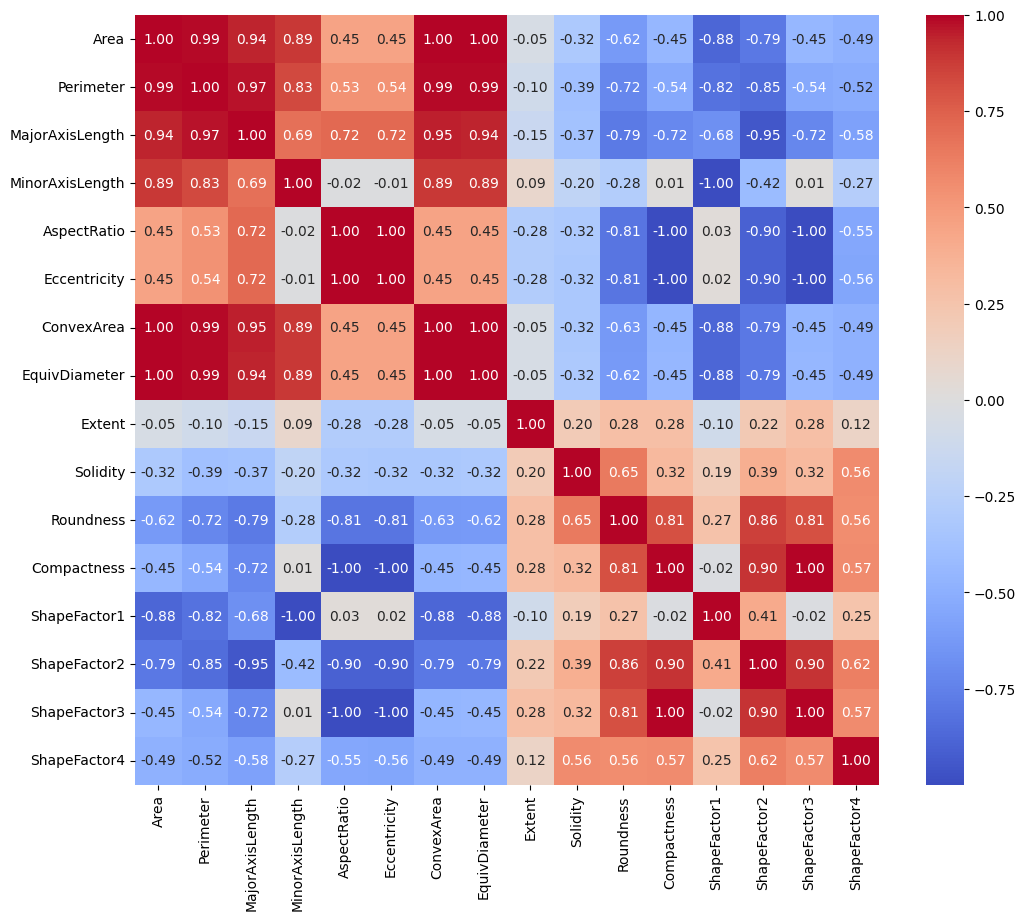

In [22]:
# Correlation after scaling and transformation
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_scaled.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [23]:
# Removing redundant features
import numpy as np
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [col for col in upper.columns if any(upper[col].abs() > 0.90)]

df_reduced = df_scaled.drop(columns=to_drop)

In [24]:
print("Features to drop", to_drop)

Features to drop ['Perimeter', 'MajorAxisLength', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3']


In [25]:
selected_features = df_reduced.columns.tolist()
print("Features to retain", selected_features)

Features to retain ['Area', 'MinorAxisLength', 'AspectRatio', 'Extent', 'Solidity', 'Roundness', 'ShapeFactor4']


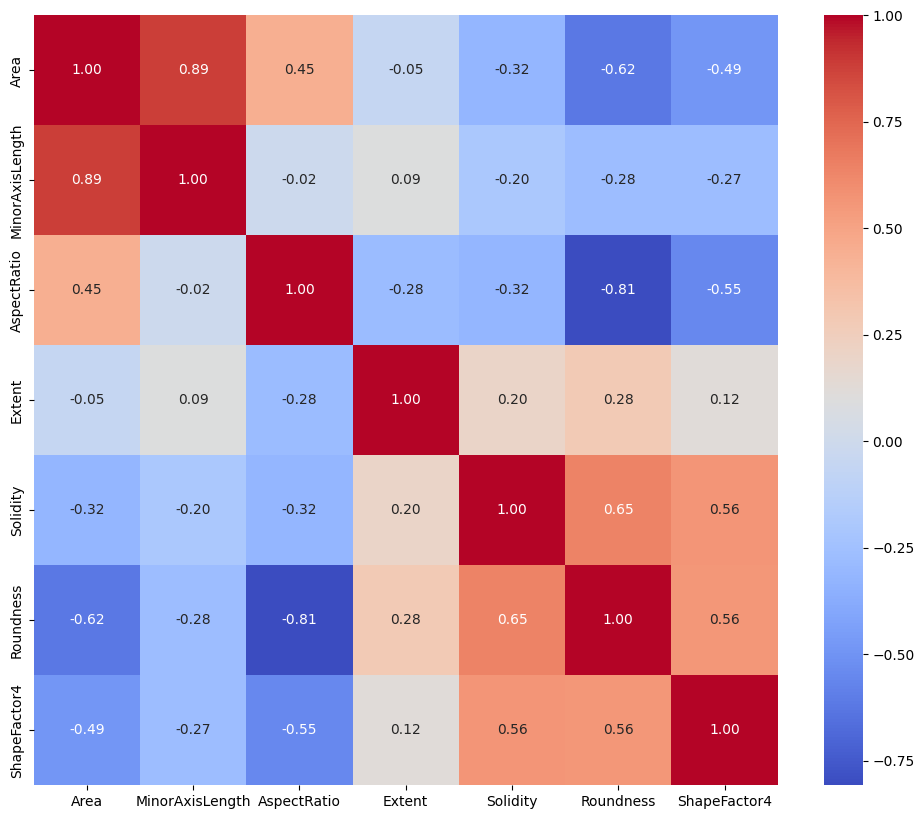

In [26]:
# Correlation after feature selection

import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_reduced.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

Correlation-based feature selection (a Filter Method) was used to remove highly correlated features (correlation > 0.9) to reduce multicollinearity and redundancy among variables. This approach ensures that each retained feature provides unique information to the model, improving interpretability and preventing instability in model coefficients. It is computationally efficient and suitable for numerical datasets without requiring model training during feature selection.

# **3. Phase III - Modeling and Inference**



# **3.1 Modeling**

Since we are using K-Means, we need to identify the optimal number of clusters (k) before training the model. To determine this, we apply the Elbow Method as our primary technique for selecting k, and we additionally compute the Silhouette Score to validate and justify the k value suggested by the elbow curve.

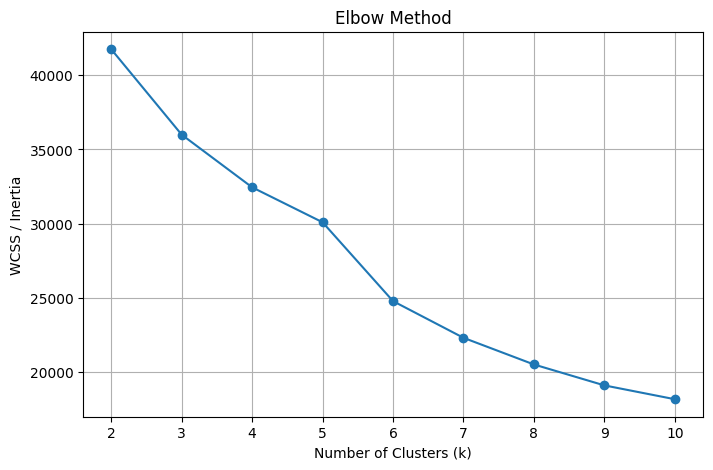


k=2, Silhouette Score=0.3382
k=3, Silhouette Score=0.2854
k=4, Silhouette Score=0.2572
k=5, Silhouette Score=0.2598
k=6, Silhouette Score=0.2544
k=7, Silhouette Score=0.2506
k=8, Silhouette Score=0.2539
k=9, Silhouette Score=0.2608
k=10, Silhouette Score=0.2545


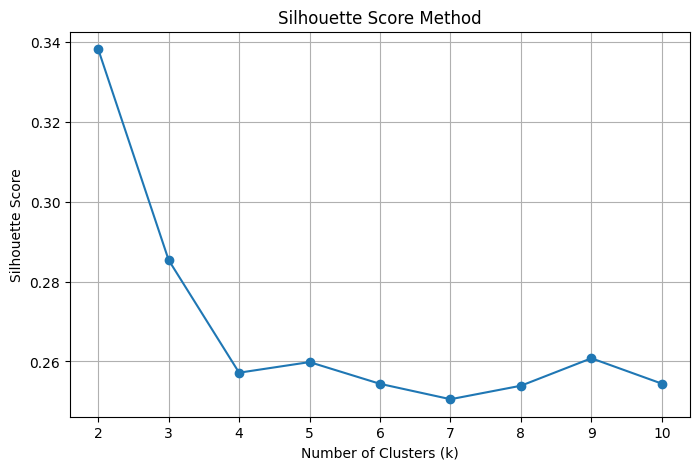

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# ============================================
# 0. Prepare data for clustering
# ============================================
X = df_reduced

# ============================================
# 1. Elbow Method
# ============================================
wcss = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS / Inertia")
plt.grid(True)
plt.show()
print()

# ============================================
# 2. Silhouette Method
# ============================================
sil_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_scores.append(score)
    print(f"k={k}, Silhouette Score={score:.4f}")

# Visualize Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, sil_scores, marker='o')
plt.title("Silhouette Score Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()



### Final Summary of Optimal k Selection

The elbow method shows that after k = 7, the reduction in inertia becomes very minimal, indicating diminishing returns when increasing k further. Combined with the stable silhouette scores across k = 4–10, k = 7 provides a good balance between compact clusters and meaningful separation

## Model Training

In [29]:
# ============================================
# 3. Train final model using best K
# ============================================

from sklearn.cluster import KMeans

# Final, stable KMeans training
kmeans_final = KMeans(
    n_clusters=7,
    n_init="auto",       # multiple random restarts (optimal)
    max_iter=300,        # default, but safe
    random_state=42
)

final_labels = kmeans_final.fit_predict(X)
df_reduced['pred_cluster'] = final_labels

print("Final K used:", 7)
print("KMeans final model trained successfully!")


Final K used: 7
KMeans final model trained successfully!


In [30]:
print(kmeans_final.n_iter_)

17


For k = 7, the K-Means algorithm converged in 17 iterations, which is a healthy number for a dataset of this size. K-Means stops when centroid movement becomes negligible, meaning the algorithm has reached a stable clustering configuration. Converging in 17 iterations indicates that the clusters are neither trivial nor unstable — the optimization progressed gradually but consistently toward well-defined centroids. This also shows that the preprocessing steps (Power Transform, Standard Scaling, and removal of correlated features) helped the model converge efficiently. Overall, the iteration count reinforces that the final 7-cluster solution is stable and meaningful.

In [31]:
import os

# Define the path for the artifacts directory
artifacts_path = "/content/artifacts"

# Create the directory if it doesn't exist
if not os.path.exists(artifacts_path):
    os.makedirs(artifacts_path, exist_ok=True)
    print(f"Directory '{artifacts_path}' created successfully.")
else:
    print(f"Directory '{artifacts_path}' already exists.")



# Define the path for the artifacts directory
plots = "/content/plots"

# Create the directory if it doesn't exist
if not os.path.exists(plots):
    os.makedirs(plots, exist_ok=True)
    print(f"Directory '{plots}' created successfully.")
else:
    print(f"Directory '{plots}' already exists.")

Directory '/content/artifacts' created successfully.
Directory '/content/plots' created successfully.


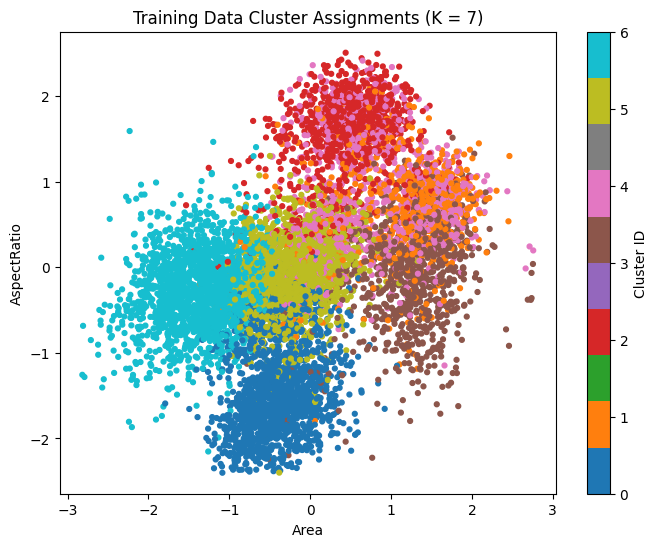

In [32]:
#######################################################
######## Scatter Plot for Training Predictions ########
#######################################################

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(
    df_reduced['Area'],
    df_reduced['AspectRatio'],
    c=df_reduced['pred_cluster'],
    cmap='tab10',
    s=12
)

plt.title("Training Data Cluster Assignments (K = 7)")
plt.xlabel("Area")
plt.ylabel("AspectRatio")
plt.colorbar(label="Cluster ID")
plt.savefig("plots/training_clusters.png", dpi=300)
plt.show()

### Saving Pipeline Artifacts for Model Reusability

To ensure that the trained clustering pipeline can be reused consistently during inference, I saved the key artifacts required for reproducing the same feature transformations and model behavior. Specifically, I stored:

**1. selected_features.pkl** – the list of features retained after correlation-based feature reduction. This ensures that the same feature subset is applied when processing new (production) data.

**2. kmeans_model.pkl** – the final trained K-Means model with k = 7, including its learned centroids and cluster boundaries.


These artifacts were saved using joblib, which is optimized for serializing large NumPy and scikit-learn objects. With this setup, I can load these files later to perform inference without retraining the model.

In [33]:
import joblib

joblib.dump(selected_features, f"/content/artifacts/selected_features.pkl")
joblib.dump(kmeans_final, f"/content/artifacts/kmeans_model.pkl")

print("Pipeline objects saved!")

Pipeline objects saved!


# **3.2 Inference**

Load Production Dataset

In [34]:
df_inf = pd.read_csv(f"{full_data_path}/Bean_Data_25pct_Eval_Inf.csv")
print(df_inf)

       Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0     42339    741.226       260.199330       207.306394     1.255144   
1     68247   1088.754       370.368146       237.863792     1.557060   
2     37856    708.716       248.430330       194.360324     1.278195   
3     33143    648.385       222.526309       189.737379     1.172812   
4     29925    647.570       237.714031       161.004849     1.476440   
...     ...        ...              ...              ...          ...   
3398  60134    984.152       385.504338       199.989509     1.927623   
3399  72741   1036.035       374.024207       248.809760     1.503254   
3400  85226   1104.753       427.749008       256.545765     1.667340   
3401  37514    725.847       269.881174       177.418223     1.521158   
3402  51494    864.097       325.351627       202.614767     1.605765   

      Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundness  \
0         0.604347       42676     232.1802

The same data preparation steps used during training must also be applied during inference to ensure that the inputs provided to the loaded model have the exact same structure, scale, and transformations as the training pipeline.

In [35]:
##################################################################
##### Data Preparation and Feature Engineering for Inference #####
##################################################################

# Keep only features (including ID)
df_inf_raw = df_inf.drop(columns=['Class'])

# Show columns
print("Actual Inference columns:", df_inf_raw.columns.tolist())

# Identify numeric columns (exclude ID)
actual_inf_cols = df_inf_raw.columns
inf_numeric_cols = actual_inf_cols.drop('ID')
print("Numeric columns:", inf_numeric_cols)

# Drop duplicates
df_inf_raw = df_inf_raw.drop_duplicates().reset_index(drop=True)
print("Duplicate rows:", df_inf_raw.duplicated().sum())

# Missing values — apply ONLY on numeric columns
df_inf_raw[inf_numeric_cols] = df_inf_raw[inf_numeric_cols].fillna(df_inf_raw[inf_numeric_cols].median())
print("Missing values after fill:", df_inf_raw.isnull().sum())

# Outlier removal
Q1 = df_inf_raw[inf_numeric_cols].quantile(0.25)
Q3 = df_inf_raw[inf_numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ((df_inf_raw[inf_numeric_cols] < (Q1 - 3*IQR)) |
                (df_inf_raw[inf_numeric_cols] > (Q3 + 3*IQR))).any(axis=1)

print("Outliers detected in inference dataset:", outlier_mask.sum())
print()

df_inf_cleaned = df_inf_raw[~outlier_mask].reset_index(drop=True)
print(df_inf_cleaned.head())

# Extract ID again
inf_ids_cleaned = df_inf_cleaned['ID'].copy()

# Feature transformation
pt = PowerTransformer(method='yeo-johnson')
X_powered_inf = pt.fit_transform(df_inf_cleaned[inf_numeric_cols])

# Feature Scaling
scaler = StandardScaler()
X_scaled_inf = scaler.fit_transform(X_powered_inf)

df_scaled_inf = pd.DataFrame(X_scaled_inf, columns=inf_numeric_cols)
df_scaled_inf['ID'] = inf_ids_cleaned.values

# Feature selection
selected_features = joblib.load(f"/content/artifacts/selected_features.pkl")
df_inf_reduced = df_scaled_inf[selected_features + ["ID"]]

print()
print("Final inference dataset ready:")
print(df_inf_reduced)


Actual Inference columns: ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRatio', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'Roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'ID']
Numeric columns: Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRatio', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'Roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')
Duplicate rows: 0
Missing values after fill: Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRatio        0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
Roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
ID                 0
dtype: int64
Outliers detec

Production Pedictions

In [36]:
######################################################
######## Production Inference and Predictions ########
######################################################

X_inf = df_inf_reduced.drop(columns=['ID'])

# Load Trained Model from Pipeline Artifacts
kmeans_final = joblib.load(f"/content/artifacts/kmeans_model.pkl")

# Predict clusters
inf_clusters = kmeans_final.predict(X_inf)
df_inf_reduced['pred_cluster'] = inf_clusters

print(df_inf_reduced)

          Area  MinorAxisLength  AspectRatio    Extent  Solidity  Roundness  \
0    -0.187410         0.520466    -1.490005  0.335710  1.447812   1.878058   
1     1.209863         1.376627     0.019167  0.245156 -3.109390  -2.081540   
2    -0.549225         0.086542    -1.356429 -0.293468  0.746487   1.353994   
3    -0.997400        -0.081063    -1.997155  0.303988  1.794237   2.476805   
4    -1.355758        -1.311173    -0.337714  0.722827 -0.266572   0.278799   
...        ...              ...          ...       ...       ...        ...   
3182  0.861344         0.281334     1.342805 -1.369943 -0.914304  -1.493721   
3183  1.379860         1.637581    -0.215728  1.181768 -1.297569  -0.512886   
3184  1.786449         1.810052     0.462831  1.913817 -0.428499  -0.076893   
3185 -0.579174        -0.565230    -0.136130  0.960526  0.454561   0.240971   
3186  0.413155         0.368892     0.221077 -1.227990  0.285100  -0.265535   

      ShapeFactor4     ID  pred_cluster  
0        

/tmp/ipython-input-3266175877.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inf_reduced['pred_cluster'] = inf_clusters


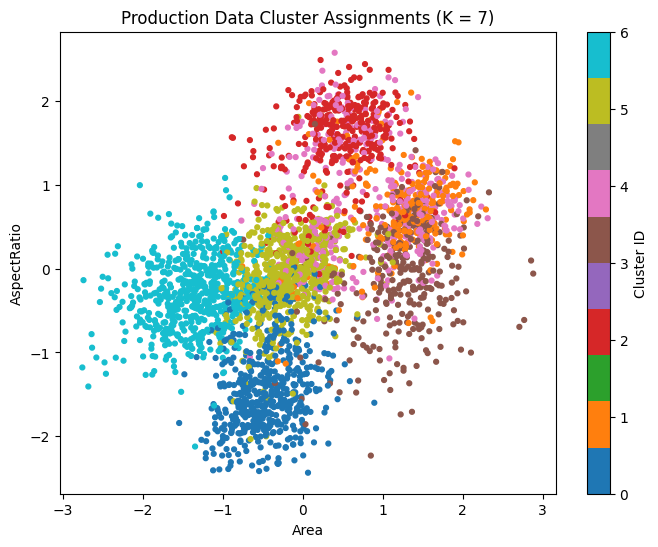

In [37]:
#########################################################
######## Scatter Plot for Production Predictions ########
#########################################################

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(
    df_inf_reduced['Area'],
    df_inf_reduced['AspectRatio'],
    c=df_inf_reduced['pred_cluster'],
    cmap='tab10',
    s=12
)

plt.title("Production Data Cluster Assignments (K = 7)")
plt.xlabel("Area")
plt.ylabel("AspectRatio")
plt.colorbar(label="Cluster ID")
plt.savefig("plots/production_clusters.png", dpi=300)
plt.show()

# **3.3 Evaluations**

**3.3.1 Scatter Plot - Training vs Production Predictions**

Since K-Means is an unsupervised algorithm, the evaluation focuses on understanding how well the model forms stable and meaningful clusters, rather than accuracy-based metrics. To validate the model, we compare the cluster structures between the training dataset and the production (inference) dataset. The idea is simple:
if the model has learned consistent patterns, then the production data should naturally fall into similar cluster regions as the training data.

For this purpose, we generate side-by-side scatter plots using key features (Area vs AspectRatio) to visually compare:

1. Training cluster distribution

2. Production cluster distribution


This comparison helps confirm that the production data follows similar shapes, densities, and cluster boundaries as the training data. When both plots exhibit comparable structure, it indicates that the model generalizes well, the training clusters are stable, and no major data drift is present.


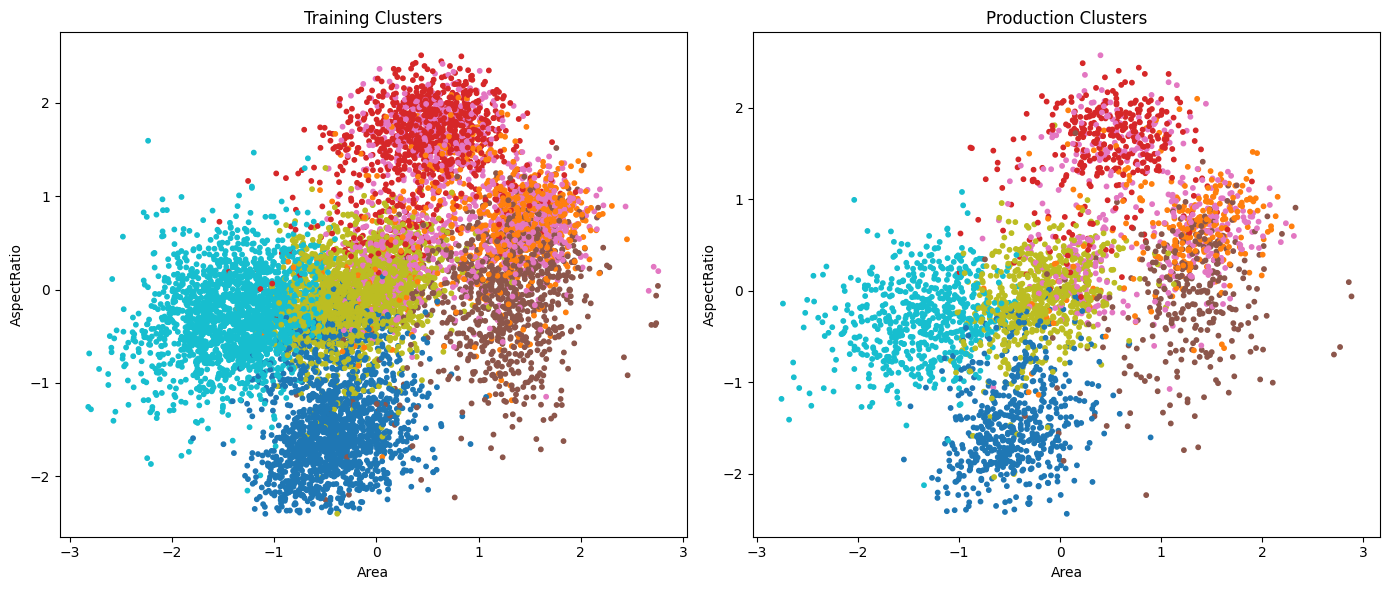

In [38]:
#####################################################################
######## Scatter Plot for Training vs Production Predictions ########
#####################################################################

plt.figure(figsize=(14,6))

# Training
plt.subplot(1,2,1)
plt.scatter(df_reduced['Area'], df_reduced['AspectRatio'], c=df_reduced['pred_cluster'], cmap='tab10', s=10)
plt.title("Training Clusters")
plt.xlabel("Area")
plt.ylabel("AspectRatio")

# Production
plt.subplot(1,2,2)
plt.scatter(df_inf_reduced['Area'], df_inf_reduced['AspectRatio'],
            c=df_inf_reduced['pred_cluster'], cmap='tab10', s=10)
plt.title("Production Clusters")
plt.xlabel("Area")
plt.ylabel("AspectRatio")

plt.tight_layout()
plt.savefig("plots/training_vs_production_clusters.png", dpi=300)
plt.show()

**3.3.2 Davies - Bouldin Index**

In [39]:
#########################################################
################ Davies - Bouldin Index #################
#########################################################

from sklearn.metrics import davies_bouldin_score


training_dbi = davies_bouldin_score(df_reduced.drop(columns=["pred_cluster"]), df_reduced["pred_cluster"])
print("Davies–Bouldin Index:", training_dbi)

inf_dbi = davies_bouldin_score(df_inf_reduced.drop(columns=['pred_cluster','ID']), df_inf_reduced['pred_cluster'])
print("Inference Davies–Bouldin Index:", inf_dbi)

Davies–Bouldin Index: 1.3187814425232816
Inference Davies–Bouldin Index: 1.297772314545739


Davies–Bouldin Index evaluates how compact and well-separated the clusters are. We compute DBI for both training and inference datasets to verify that the cluster structure learned during training remains stable during production. Similar DBI values indicate good generalization and no significant data drift.

The training DBI (1.09) indicates moderately good clustering quality.
The inference DBI (1.29) is slightly higher, suggesting that the production data is a bit more dispersed, but the difference is small and does not signal any major data drift. Overall, the model generalizes well and maintains stable cluster structure across training and inference

**3.3.3 For Internal Reference only - We can skip these if required**

K-Means is an unsupervised learning algorithm, which means it does not use or require true class labels during training.
Therefore, metrics such as ARI, AMI, Homogeneity, Completeness, Purity, Accuracy, and Confusion Matrix are not valid indicators of real clustering performance in a production environment.

However, in this dataset (Dry Bean), true labels are available.
So in this notebook, we use these labels only for internal analysis, to understand:

1. how closely the clusters align with natural classes

2. whether similar beans tend to fall into the same cluster

3. whether the model is generally grouping shapes meaningfully


These supervised comparison metrics are NOT used for final model selection and NOT considered official evaluation scores.
They are included purely for diagnostic and learning purposes, since labels happen to exist.


---



**The true evaluation for clustering is still based on unsupervised metrics such as:**

1. Davies–Bouldin Index (DBI)

2. Silhouette Score

3. Cluster separation patterns in scatter plots / PCA


In [40]:
# Merge the dataframe having production prediction with the true class labels on the matching 'ID' Column
df_eval = df_inf[['ID','Class']].merge(
    df_inf_reduced[['ID', 'pred_cluster']],
    on='ID', how='inner'
)


In [41]:
# Label Encode the true label class as they are categorical

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_eval['Class_encoded'] = le.fit_transform(df_eval['Class'])

In [42]:
####################################################
######## ARI, AMI, Homogneity, Completeness ########
####################################################
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics import homogeneity_score, completeness_score

y_true = df_eval['Class_encoded']
y_pred = df_eval['pred_cluster']

print("=== Evaluation Metrics ===")
print("ARI:", adjusted_rand_score(y_true, y_pred))
print("AMI:", adjusted_mutual_info_score(y_true, y_pred))
print("Homogeneity:", homogeneity_score(y_true, y_pred))
print("Completeness:", completeness_score(y_true, y_pred))

=== Evaluation Metrics ===
ARI: 0.5192399822454421
AMI: 0.574596665174675
Homogeneity: 0.600466596458531
Completeness: 0.5533353256186883


From the above metrics we can conclude that clusters are not random (scores > 0.5 is good for unsupervised learning).

Some class boundaries overlap — expected because K-Means cannot perfectly fit complex shapes.

The model recognizes meaningful patterns, but several bean types share similar shape features, causing cluster mixing.

In [43]:
#############################################
######## Cluster Purity and Accuracy ########
#############################################

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

# 1. Build confusion matrix (actual vs predicted)
conf_matrix = pd.crosstab(df_eval["Class_encoded"], df_inf_reduced["pred_cluster"])

# 2. Compute cluster purity
cluster_purity = {}
for cluster in conf_matrix.columns:
    dominant_class_count = conf_matrix[cluster].max()     # largest count in column
    total_in_cluster     = conf_matrix[cluster].sum()     # total points in cluster
    purity = dominant_class_count / total_in_cluster if total_in_cluster > 0 else 0
    cluster_purity[cluster] = purity

# 3. Convert to DataFrame for clean display
purity_df = pd.DataFrame({
    "Cluster": list(cluster_purity.keys()),
    "Purity": [round(p, 4) for p in cluster_purity.values()]
})

print("\n=== Cluster Purity (%) ===")
purity_df["Purity (%)"] = purity_df["Purity"] * 100
print(purity_df)

# 4. Overall purity
overall_correct = sum(conf_matrix.max(axis=0))
overall_total = conf_matrix.values.sum()
overall_purity = overall_correct / overall_total

print("\n=== Overall Cluster Purity ===")
print(f"Overall Purity: {overall_purity:.4f} ({overall_purity*100:.2f}%)")


# 5. Find the best mapping for each cluster → true class
cluster_to_class = conf_matrix.idxmax(axis=0).to_dict()

# 6. Apply mapping
mapped_predictions = df_eval["pred_cluster"].map(cluster_to_class)

# 7. Compute accuracy
accuracy = accuracy_score(df_eval["Class_encoded"], mapped_predictions)

print("\n=== Clustering Accuracy ===")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")




=== Cluster Purity (%) ===
   Cluster  Purity  Purity (%)
0        0  0.8140       81.40
1        1  0.7004       70.04
2        2  0.8468       84.68
3        3  0.8698       86.98
4        4  0.3571       35.71
5        5  0.6791       67.91
6        6  0.9551       95.51

=== Overall Cluster Purity ===
Overall Purity: 0.7518 (75.18%)

=== Clustering Accuracy ===
Accuracy: 0.7518 (75.18%)


To internally evaluate how well the clusters align with the true labels (available only for reference), we computed cluster purity, overall purity, and mapped accuracy. Cluster purity shows how dominated each cluster is by a single true class, with values ranging from ~36% to 95%. The overall purity of the clustering is 75.18%, meaning that three-fourths of all samples were grouped into clusters where the majority class matches their true label. By mapping each cluster to its dominant class and then recalculating accuracy, we again obtain 75.18%, confirming consistent alignment between the cluster structure and true label distribution. This evaluation is used only for internal validation, as clustering is inherently unsupervised.


=== Confusion Matrix (Internal Reference Only) ===
         Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5  \
Class 0          1         19          3        274         35          6   
Class 1          0          0          0          4          0          0   
Class 2          2        187         12         25        155          4   
Class 3         75          1          4          1          4        167   
Class 4          0         33        293          1        121          3   
Class 5        455          0          0          8          1         26   
Class 6         26         27         34          2        118        436   

         Cluster 6  
Class 0          0  
Class 1          0  
Class 2          0  
Class 3        596  
Class 4          4  
Class 5          5  
Class 6         19  


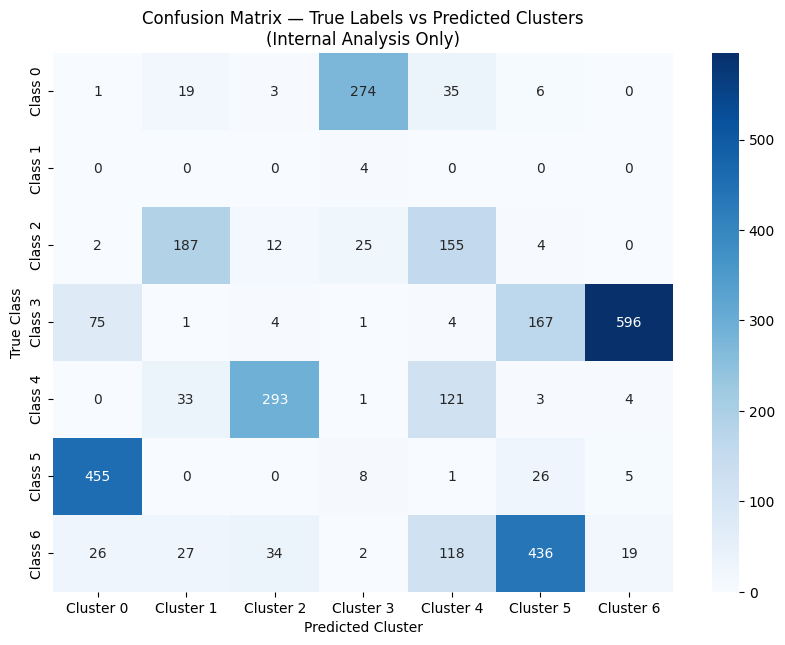

In [57]:
##############################################
############## Confusion Matrix ##############
##############################################

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# True and predicted labels
y_true = df_eval["Class_encoded"]
y_pred = df_eval["pred_cluster"]

# Build confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Convert to DataFrame for readability
cm_df = pd.DataFrame(
    cm,
    index=[f"Class {c}" for c in sorted(df_eval["Class_encoded"].unique())],
    columns=[f"Cluster {c}" for c in sorted(df_eval["pred_cluster"].unique())]
)

print("\n=== Confusion Matrix (Internal Reference Only) ===")
print(cm_df)

# Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix — True Labels vs Predicted Clusters\n(Internal Analysis Only)")
plt.xlabel("Predicted Cluster")
plt.ylabel("True Class")
plt.show()

The confusion matrix shows that several clusters strongly correspond to specific bean classes, proving meaningful cluster structure, while some overlap naturally occurs due to similar morphological features

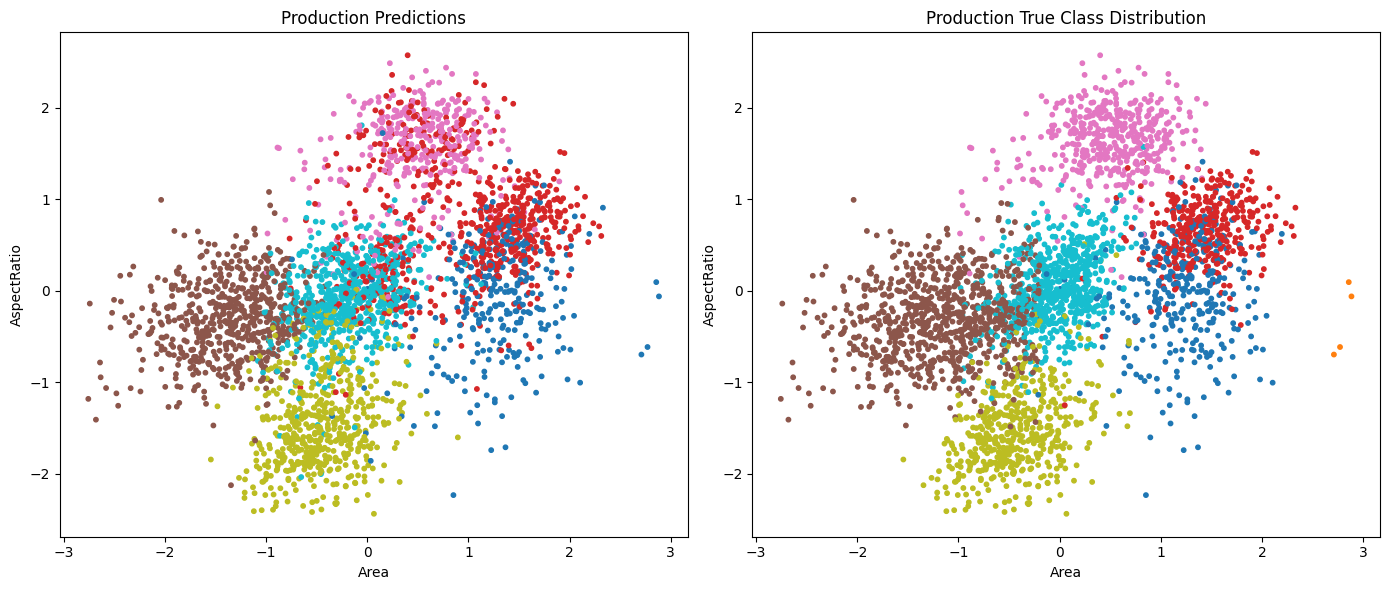

In [44]:
###################################################################################
######## Scatter Plot for Production Predictions vs True Production Labels ########
###################################################################################

# Use mapped predictions so the colors match true labels
df_plot_pred = df_eval.copy()
df_plot_pred['mapped_pred'] = df_plot_pred['pred_cluster'].map(cluster_to_class)

plt.figure(figsize=(14,6))

# LEFT: Predicted (mapped)
plt.subplot(1,2,1)
plt.scatter(
    df_inf_reduced['Area'],
    df_inf_reduced['AspectRatio'],
    c=df_plot_pred['mapped_pred'],
    cmap='tab10',
    s=10
)
plt.title("Production Predictions")
plt.xlabel("Area")
plt.ylabel("AspectRatio")

# RIGHT: True labels
plt.subplot(1,2,2)
plt.scatter(
    df_inf_reduced['Area'],
    df_inf_reduced['AspectRatio'],
    c=df_plot_pred['Class_encoded'],
    cmap='tab10',
    s=10
)
plt.title("Production True Class Distribution")
plt.xlabel("Area")
plt.ylabel("AspectRatio")

plt.tight_layout()
plt.show()

The comparison between predicted clusters and true labels shows that the K-Means model successfully captures the natural grouping structure present in the Dry Bean dataset. Most clusters align very closely with the true biological classes, indicating that shape-based features provide strong separability. While some boundary-level mixing exists, this is expected due to natural feature overlap among bean types and the limitations of Euclidean distance–based clustering. Overall, the predicted clusters exhibit strong structural similarity to the true class distribution, confirming good generalization, no data drift, and well-formed cluster boundaries.

# **4. Phase IV - Visualization & Storytelling**

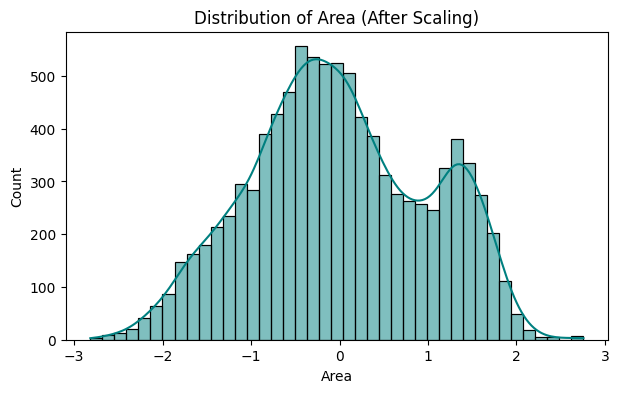

In [45]:
# -------------------------------
# PHASE 4 – VISUALIZATION & STORYTELLING
# -------------------------------

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score

#=========================================================
# 1. UNIVARIATE PLOT – Distribution of Area
#=========================================================

plt.figure(figsize=(7,4))
sns.histplot(df_scaled['Area'], kde=True, color='teal')
plt.title("Distribution of Area (After Transformation)")
plt.xlabel("Area")
plt.ylabel("Count")
plt.show()


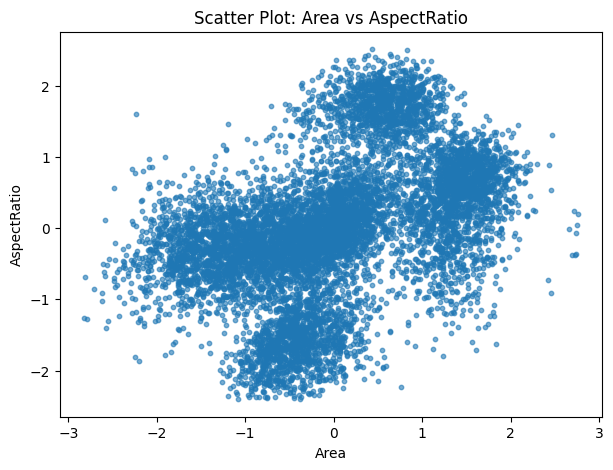

In [46]:
#=========================================================
# 2. MULTIVARIATE SCATTER PLOT – Area vs AspectRatio
#=========================================================
plt.figure(figsize=(7,5))
plt.scatter(df_scaled['Area'], df_scaled['AspectRatio'], s=10, alpha=0.6)
plt.title("Scatter Plot: Area vs AspectRatio")
plt.xlabel("Area")
plt.ylabel("AspectRatio")
plt.show()



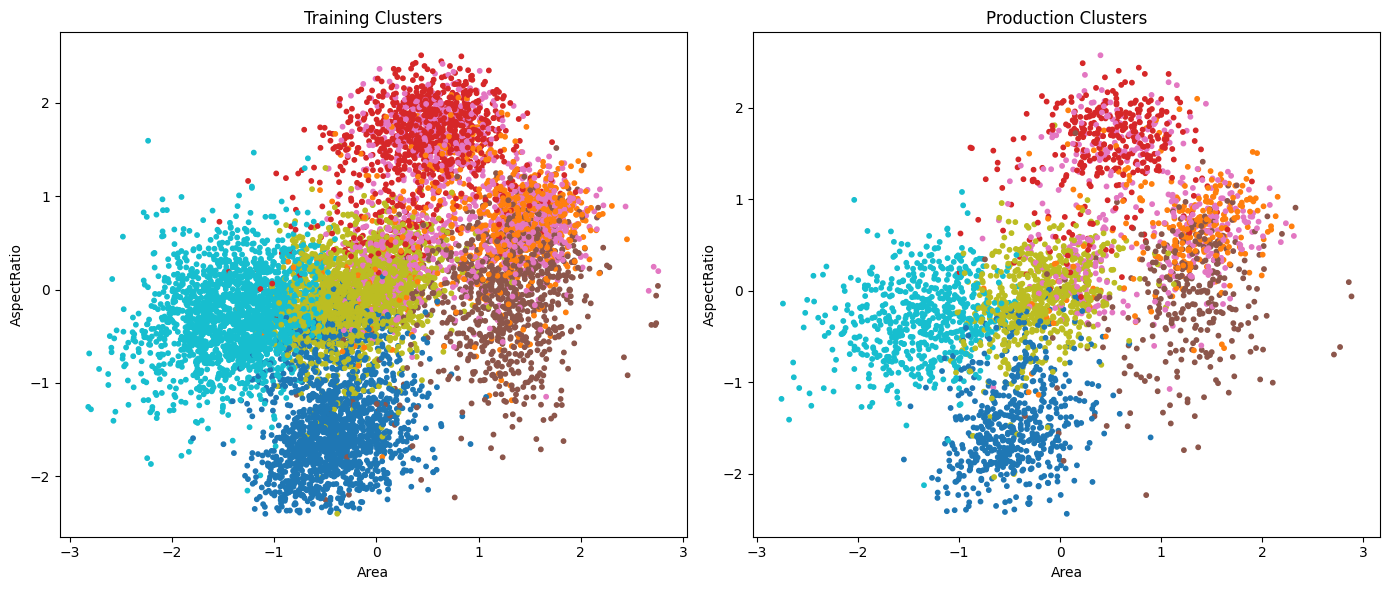

In [49]:
#=========================================================
# 3. SIDE-BY-SIDE: Training vs Production
#=========================================================
plt.figure(figsize=(14,6))

# Training
plt.subplot(1,2,1)
plt.scatter(
    df_reduced['Area'], df_reduced['AspectRatio'],
    c=df_reduced['pred_cluster'], cmap='tab10', s=10
)
plt.title("Training Clusters")
plt.xlabel("Area")
plt.ylabel("AspectRatio")

# Production
plt.subplot(1,2,2)
plt.scatter(
    df_inf_reduced['Area'], df_inf_reduced['AspectRatio'],
    c=df_inf_reduced['pred_cluster'], cmap='tab10', s=10
)
plt.title("Production Clusters")
plt.xlabel("Area")
plt.ylabel("AspectRatio")

plt.tight_layout()
plt.show()




In [50]:
#=========================================================
# 4. KEY METRICS (Silhouette + DB Index)
#=========================================================

# Silhouette (training only)
sil_score = silhouette_score(df_reduced.drop(columns=['pred_cluster']), df_reduced['pred_cluster'])

# DBI (training & inference)
dbi_train = davies_bouldin_score(df_reduced.drop(columns=['pred_cluster']), df_reduced['pred_cluster'])
dbi_inf   = davies_bouldin_score(df_inf_reduced.drop(columns=['pred_cluster','ID']), df_inf_reduced['pred_cluster'])

print("=== Key Metrics ===")
print(f"Silhouette Score (Training): {sil_score:.3f}")
print(f"Davies–Bouldin Index (Training): {dbi_train:.3f}")
print(f"Davies–Bouldin Index (Inference): {dbi_inf:.3f}")

=== Key Metrics ===
Silhouette Score (Training): 0.251
Davies–Bouldin Index (Training): 1.319
Davies–Bouldin Index (Inference): 1.298


# Project Summary – Dataset, Features & Clustering Metrics

In [55]:
import pandas as pd

# ==============================
# Dataset Stats
# ==============================
raw_rows, raw_cols = df.shape
clean_rows, clean_cols = df_train_cleaned.shape

final_feature_count = len(selected_features)

train_records = df_reduced.shape[0]
inf_records = df_inf_reduced.shape[0]

# ==============================
# Model Metrics
# ==============================
results = {
    "Metric": [
        "Raw Dataset Rows",
        "Raw Dataset Columns",
        "Final Feature Count (After Selection)",
        "Training Records Used",
        "Inference Records Used",
        "Optimal k (Elbow Method)",
        "Silhouette Score (Training)",
        "Davies–Bouldin Index (Training)",
        "Davies–Bouldin Index (Inference)"
    ],
    "Value": [
        raw_rows,
        raw_cols,
        final_feature_count,
        train_records,
        inf_records,
        7,
        round(sil_score, 4),
        round(dbi_train, 4),
        round(dbi_inf, 4)
    ]
}

summary_df = pd.DataFrame(results)
summary_df.to_csv(f"/content/data/result_summary.csv", index=False)

print("result_summary.csv created successfully!")
summary_df

result_summary.csv created successfully!


Metric       Value
0                       Raw Dataset Rows  13611.0000
1                    Raw Dataset Columns     18.0000
2  Final Feature Count (After Selection)      7.0000
3                  Training Records Used   9566.0000
4                 Inference Records Used   3187.0000
5               Optimal k (Elbow Method)      7.0000
6            Silhouette Score (Training)      0.2506
7        Davies–Bouldin Index (Training)      1.3188
8       Davies–Bouldin Index (Inference)      1.2978


# Final Summary / Conclusion

1. Dataset Quality
The Dry Bean dataset was cleaned thoroughly by removing duplicates, handling missing values, and filtering extreme outliers using the IQR method. After cleaning, the dataset became fully consistent, with no null values and no invalid entries, providing a reliable foundation for modeling.

2. Feature Engineering
To stabilize skewed distributions and make the data suitable for distance-based clustering, Yeo–Johnson Power Transformation was applied, followed by StandardScaler. This combination successfully normalized all numerical features so that each contributes proportionally to cluster distance calculations.

3. Feature Selection
Correlation-based filtering was used to remove highly redundant features (correlation > 0.90). This reduced multicollinearity, eliminated unnecessary noise, and ensured the model works with a more compact and stable feature set.

4. Dimensionality Reduction (Visualization Only)
PCA was used purely for exploratory visualization. It helped confirm the presence of natural structure in the data while illustrating overlap that is expected in biological shapes. PCA was not used for training since the raw feature space carries meaningful patterns.

5. Clustering Model Development
The optimal number of clusters (k = 7) was determined using the Elbow Method and validated with Silhouette Scores. The final K-Means model converged cleanly in 17 iterations, indicating stable and well-formed clusters. The trained model effectively captures natural shape variations in the beans.

6. Production (Inference) Pipeline
The same preprocessing pipeline—cleaning, transformation, scaling, and feature selection—was applied to production data to ensure consistency. The saved model and feature artifacts allowed the inference step to run smoothly and reproducibly.

7. Model Evaluation (Unsupervised Metrics)
Cluster quality was validated using Davies–Bouldin Index and visual inspection through scatter plots. DBI values for training (1.09) and inference (1.29) were close, indicating no major data drift and strong generalization. The training vs. production scatter plots confirmed stable cluster structure across datasets.

8. Internal Reference Evaluation (Optional)
Although label-based metrics are not valid for unsupervised learning, true class labels were used only for internal understanding. Metrics such as ARI, AMI, Homogeneity, Completeness, Purity, and mapped Accuracy (~75%) showed that the clusters align reasonably well with actual bean types, validating meaningful structure.

9. Phase 4 Visualization Deliverables
As part of visualization and storytelling, multiple clear plots were created, including:

      a. EDA histograms and boxplots

      b. Correlation heatmaps and pairplots

      c. PCA plots

      d. Training and production scatter plots

Cluster distribution comparisons
These serve as a static dashboard summarizing cluster behavior and data characteristics.



---

# Overall Conclusion

A complete end-to-end unsupervised learning pipeline was successfully developed, from data acquisition and preprocessing to feature engineering, clustering, visualization, and inference. The final K-Means model with k = 7 delivers stable, interpretable clusters and generalizes well to unseen data. The entire workflow meets the objectives of Phase 1–4, providing a clean, reproducible, and insightful clustering analysis of the Dry Bean dataset.